In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
import pickle
import random
import seaborn as sns

from skimage import transform

from skimage.util import random_noise, invert

from skimage.feature import hog, blob_dog, blob_log, blob_doh, canny

from skimage.transform import hough_circle, hough_circle_peaks, hough_ellipse, rotate, AffineTransform, warp

from skimage.filters import frangi, sato, sobel

from skimage.morphology import closing

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, LinearSVC

from sklearn.manifold import TSNE

<h1 style='text-align: center'}>TRAFFIC SIGNS CLASSIFICATION</h1>

In this project, we will deal with classification of traffic signs.

# 1. Reading the data

In [3]:
with open('traffic-signs/data0.pickle', 'rb') as f:
        data = pickle.load(f, encoding='latin1')

In [4]:
data.keys()

dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])

In [5]:
labels_names = pd.read_csv('traffic-signs/label_names.csv')
labels_names

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


The data has train,validation and test set, so we don't need to do this by ourselves. However, if we concatenate the data and split it, there is a chance that we will have data leak.

In [6]:
tf_train = data['x_train']
labels_train = data['y_train']
tf_val = data['x_validation']
labels_val = data['y_validation']
tf_test = data['x_test']
labels_test = data['y_test']

In [7]:
tf_train = tf_train.swapaxes(1, 2)
tf_train = tf_train.swapaxes(2, 3)

tf_val = tf_val.swapaxes(1, 2)
tf_val = tf_val.swapaxes(2, 3)

tf_test = tf_test.swapaxes(1, 2)
tf_test = tf_test.swapaxes(2, 3)


In [8]:
labels_train[2]

38

In [9]:
def display(image):
    plt.imshow(image)
    plt.show()

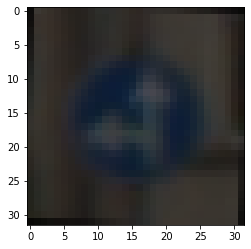

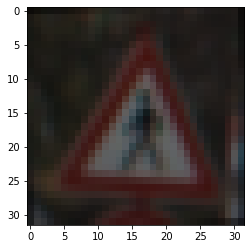

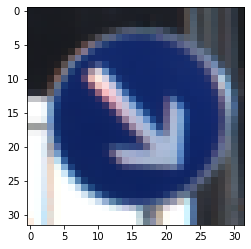

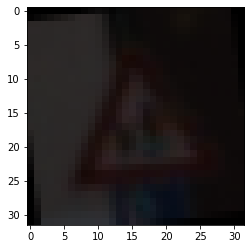

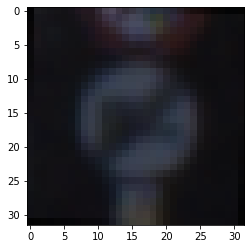

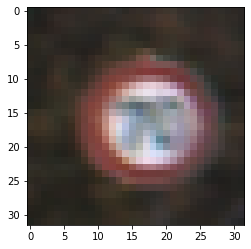

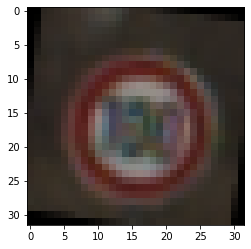

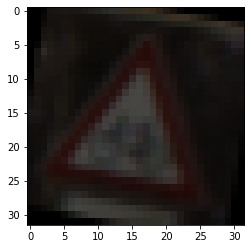

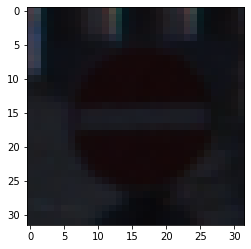

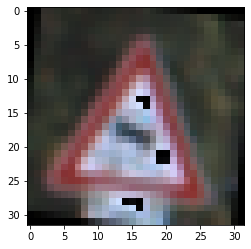

In [10]:
for i in range(0, 10):
    display(tf_train[i])

# 2. Image augmentation

## 2.1 Cropping the images

The shape of the images is **(32, 32, 3)** but the outer pixels of every images don't contain information about the traffic signs, they contain noise, so the outer 3 rows and columns will be removed from every image.

In [11]:
tf_train = [tf_train[i][3:29, 3:29] for i in range(len(tf_train))]
tf_val = [tf_val[i][3:29, 3:29] for i in range(len(tf_val))]
tf_test = [tf_test[i][3:29, 3:29] for i in range(len(tf_test))]

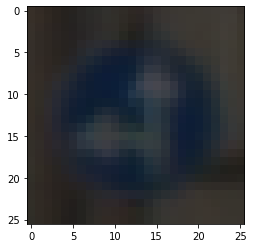

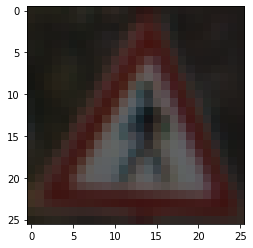

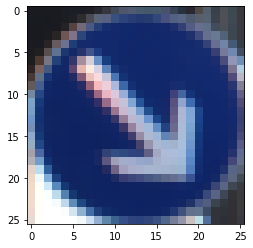

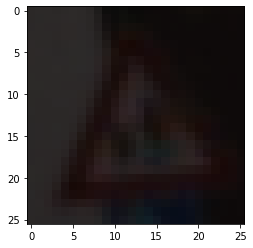

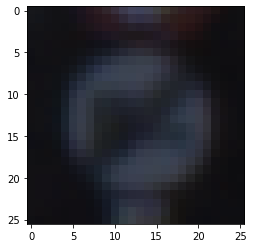

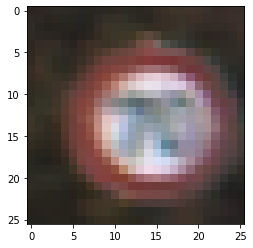

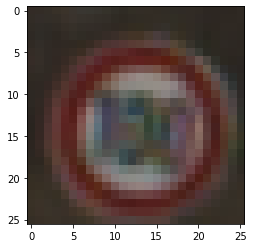

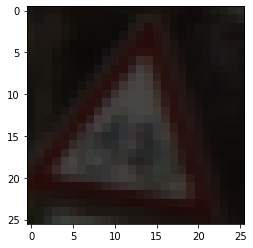

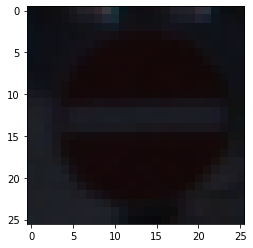

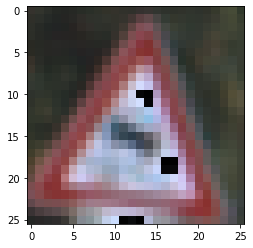

In [12]:
for i in range(0, 10):
    plt.imshow(tf_train[i])
    plt.show()

# !Important

The folowing points of point 2 are data augmentation. We have enough data, so we don't need to use it. If the user wants to try different data, he can use them, but **we will not use the code from step 2.2 to step 2.8**.

# 2.2 Image Rotation

In [14]:
rotation_30_deg = np.array([rotate(traffic_signs_resized[i], angle=30) for i in range(len(traffic_signs_resized))])

In [15]:
rotation_45_deg = np.array([rotate(traffic_signs_resized[i], angle=45) for i in range(len(traffic_signs_resized))])

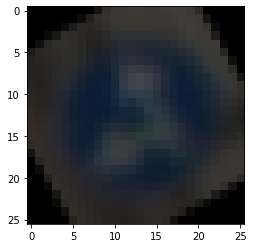

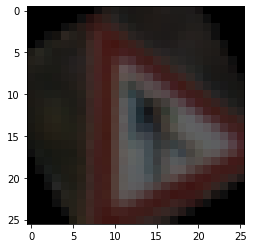

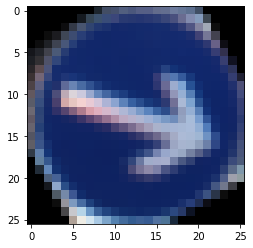

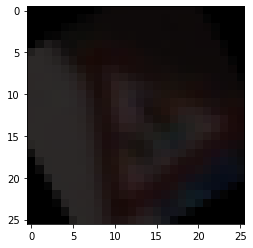

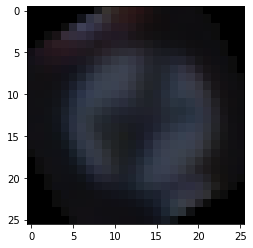

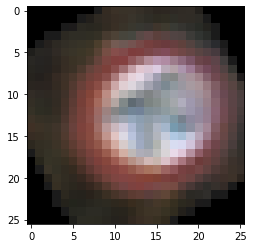

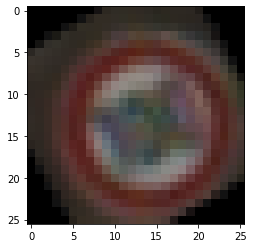

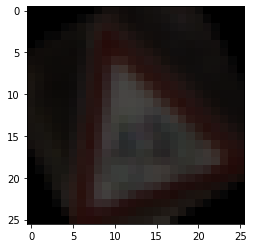

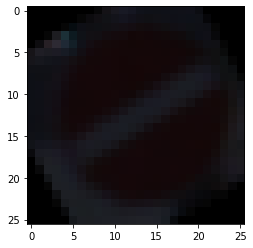

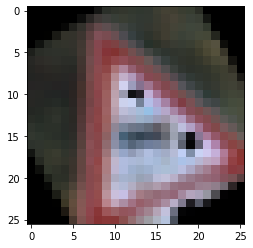

In [22]:
for i in range(10):
    display(rotation_30_deg[i])

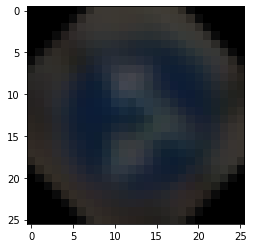

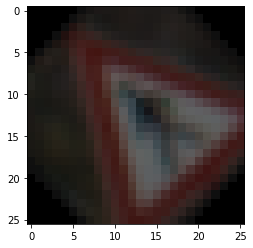

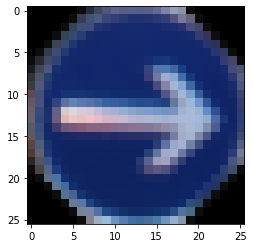

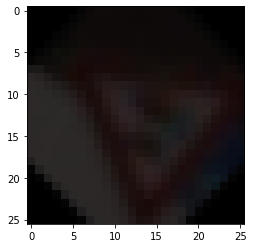

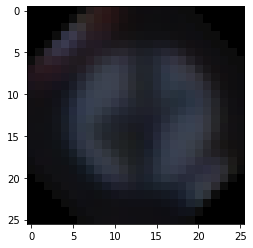

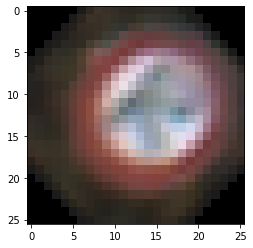

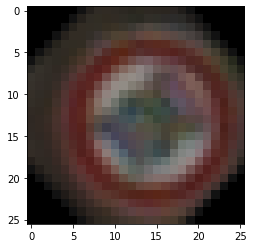

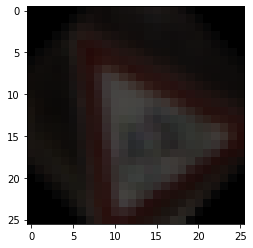

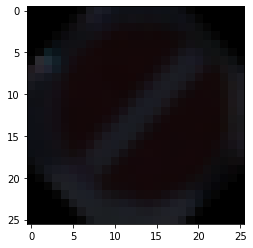

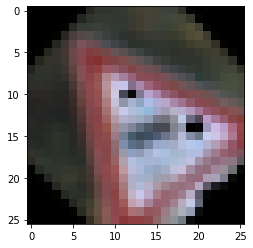

In [23]:
for i in range(10):
    display(rotation_45_deg[i])

In [24]:
rotation_30_deg_inv = np.array([rotate(traffic_signs_resized[i], angle=-30) for i in range(len(traffic_signs_resized))])

In [25]:
rotation_45_deg_inv = np.array([rotate(traffic_signs_resized[i], angle=-45) for i in range(len(traffic_signs_resized))])

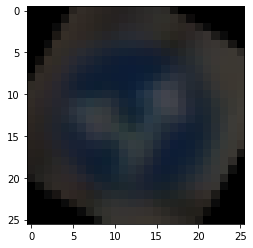

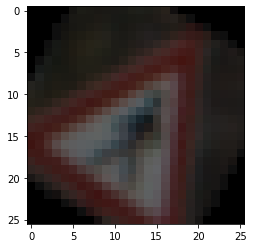

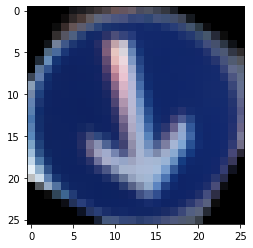

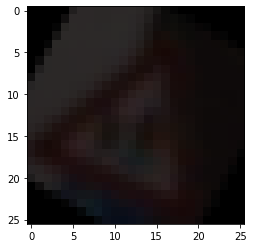

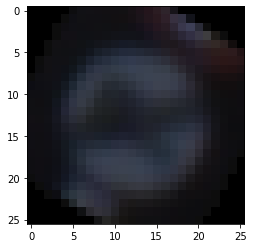

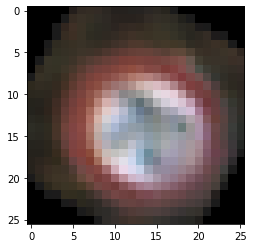

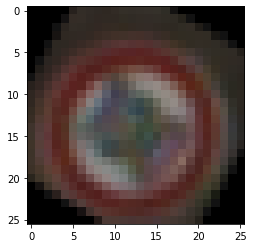

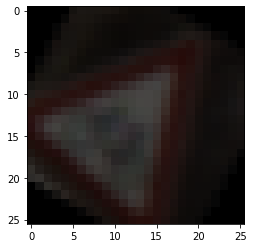

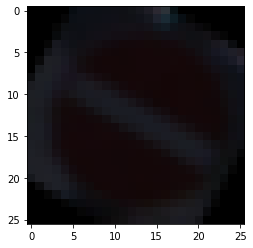

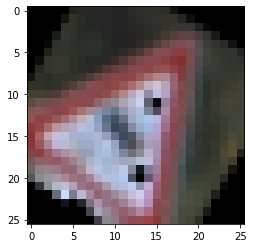

In [26]:
for i in range(10):
    display(rotation_30_deg_inv[i])

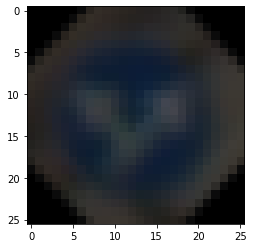

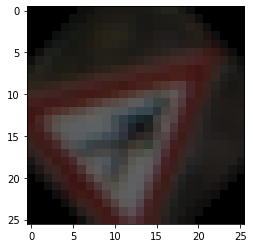

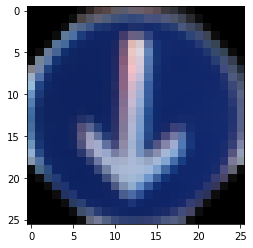

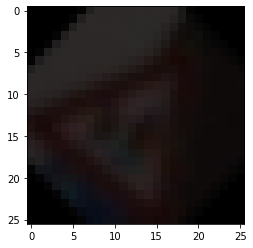

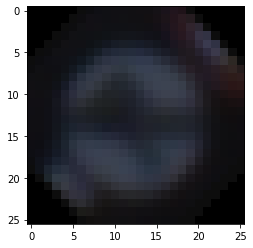

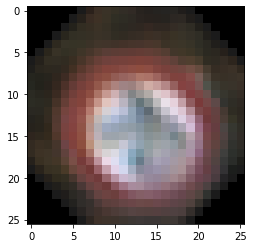

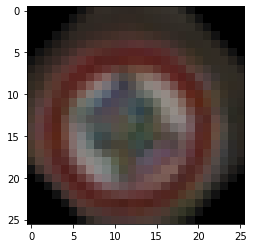

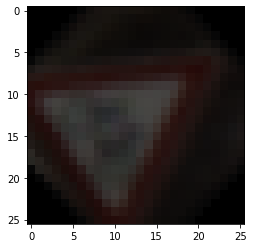

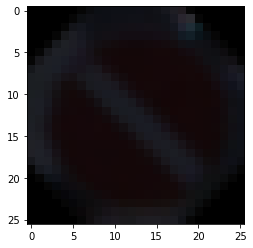

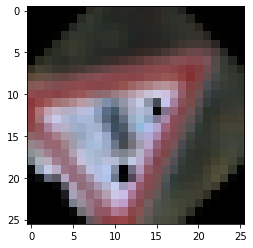

In [27]:
for i in range(10):
    display(rotation_45_deg_inv[i])

# 2.3 Image Shearing

In [28]:
traffic_signs_copy = traffic_signs_resized.copy()
tf = AffineTransform(shear=0.25)
sheared_pos = np.array([transform.warp(traffic_signs_copy[i], tf, order=1, preserve_range=True, mode='wrap') for i in range(len(traffic_signs_resized))], dtype=np.uint8)

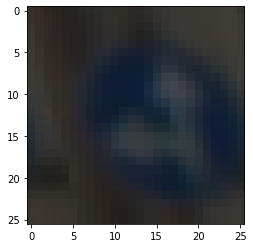

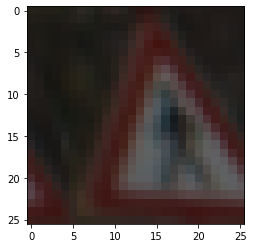

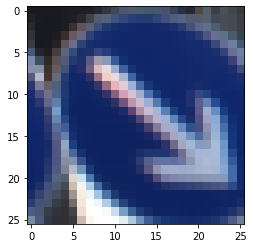

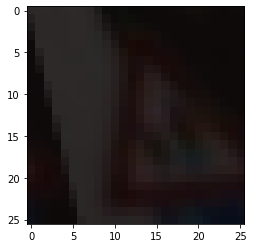

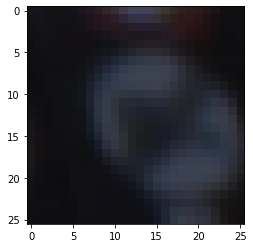

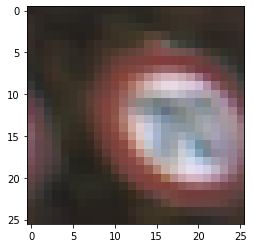

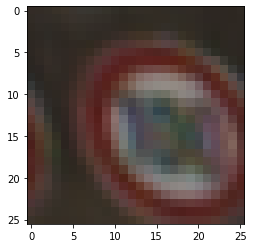

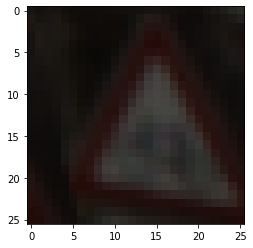

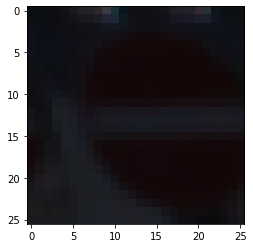

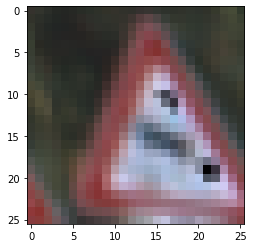

In [29]:
for i in range(10):
    display(sheared_pos[i])

In [30]:
tf_neg = AffineTransform(shear=-0.25)
sheared_neg = np.array([transform.warp(traffic_signs_copy[i], tf_neg, order=1, preserve_range=True, mode='wrap') for i in range(len(traffic_signs_resized))], dtype=np.uint8)

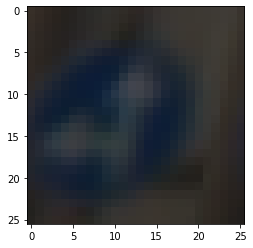

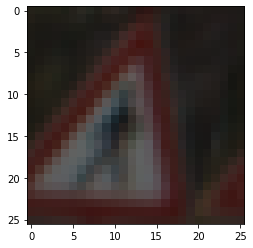

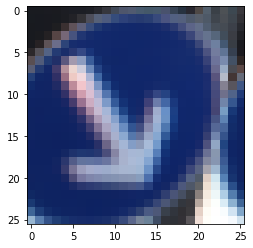

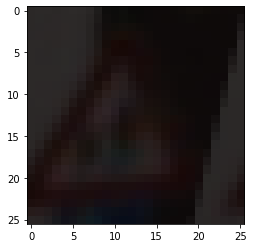

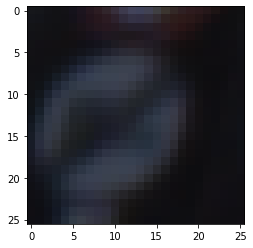

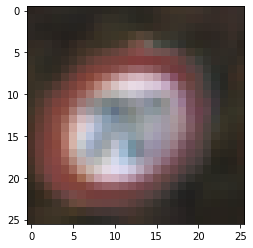

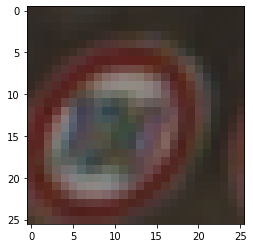

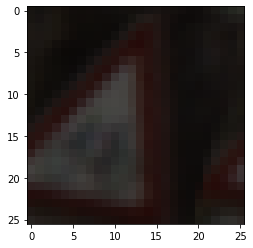

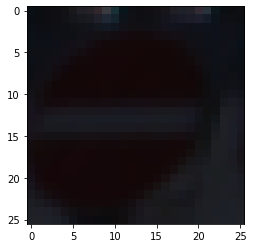

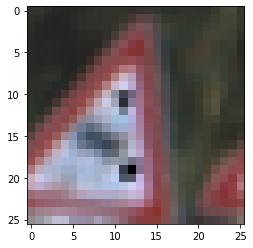

In [31]:
for i in range(10):
    display(sheared_neg[i])

# 2.4 Image Warping

In [32]:
tran = AffineTransform(translation=(7,0)) 
warped_x_pos = np.array([transform.warp(traffic_signs_resized[i],tran, mode="edge", order=1,preserve_range=True ) for i in range(len(traffic_signs_resized))], dtype=np.uint8)

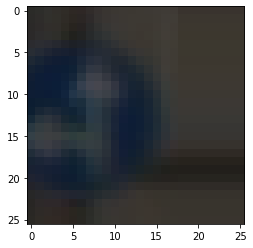

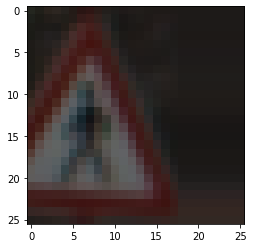

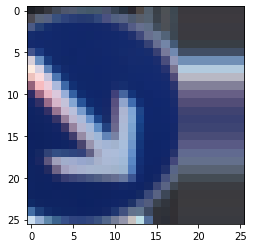

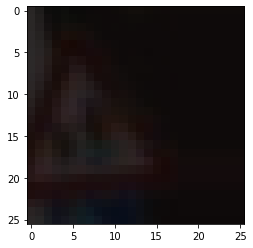

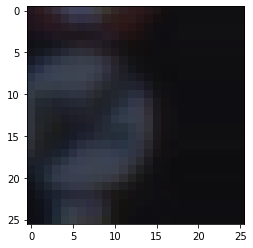

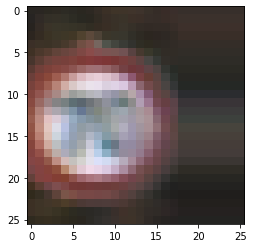

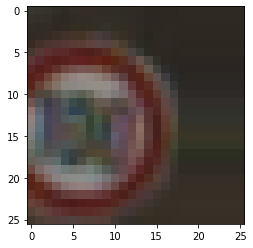

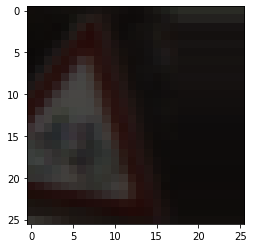

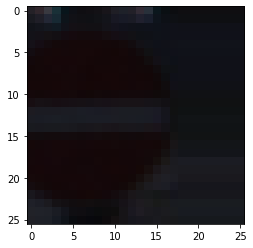

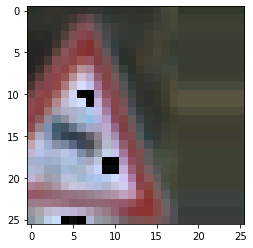

In [33]:
for i in range(10):
    display(warped_x_pos[i])

In [34]:
tran = AffineTransform(translation=(-7,0)) 
warped_x_neg = np.array([transform.warp(traffic_signs_resized[i],tran, mode="edge", order=1,preserve_range=True ) for i in range(len(traffic_signs_resized))], dtype=np.uint8)

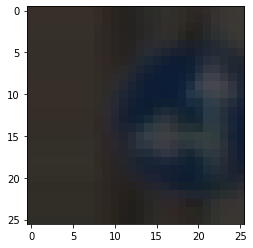

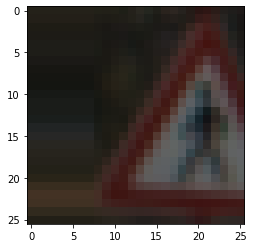

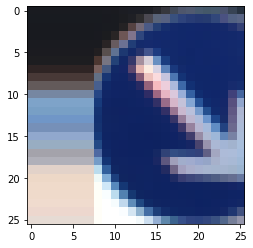

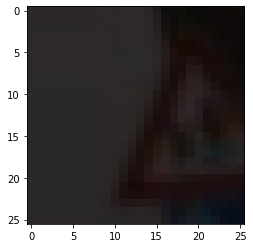

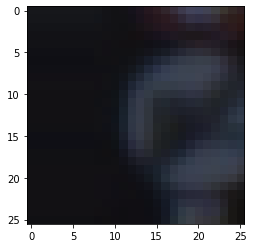

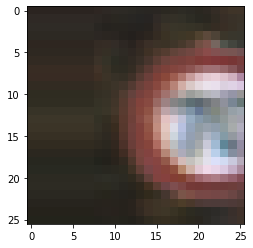

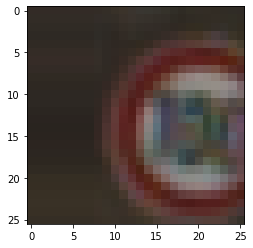

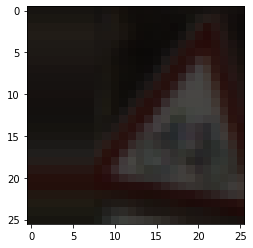

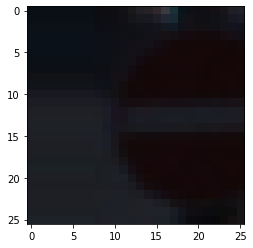

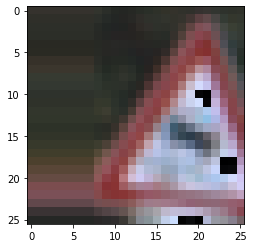

In [35]:
for i in range(10):
    display(warped_x_neg[i])

# 2.5 Image Noising

In [36]:
noise = np.array([random_noise(traffic_signs_resized[i], var=0.0015) for i in range(len(traffic_signs_resized))])

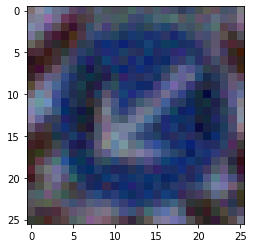

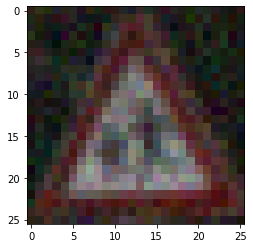

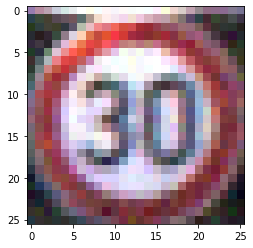

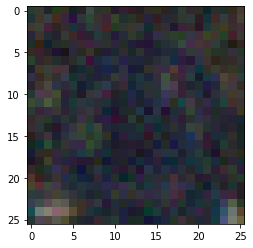

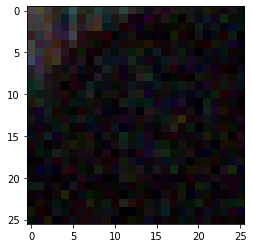

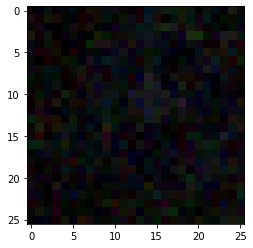

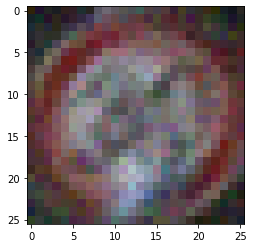

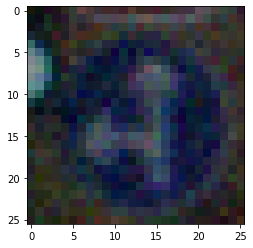

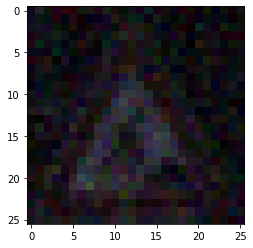

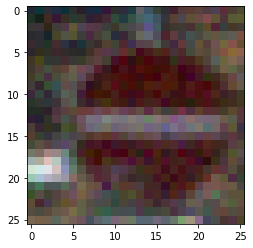

In [37]:
for i in range(40,50):
    display(noise[i])

# 2.6 Image Blurring

In [38]:
blurred = np.array([cv.GaussianBlur(traffic_signs_resized[i],(5,5),1) for i in range(len(traffic_signs_resized))])

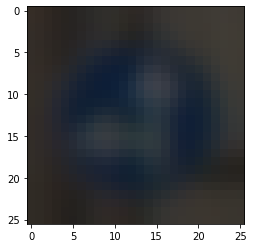

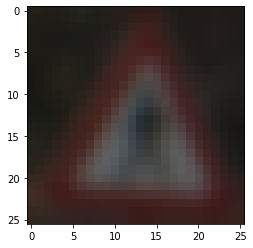

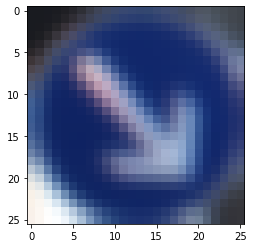

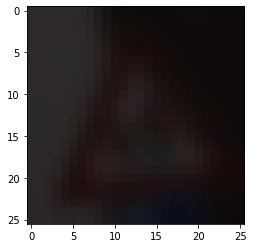

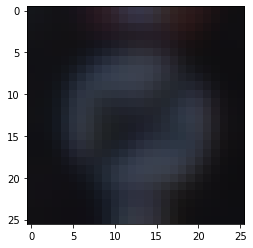

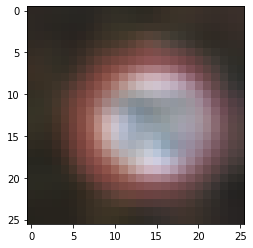

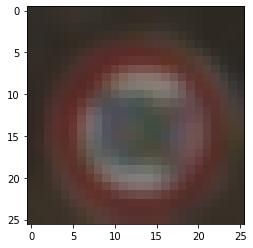

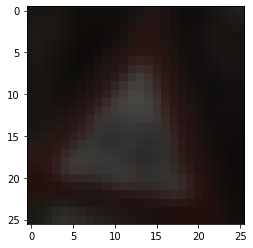

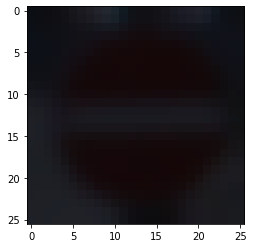

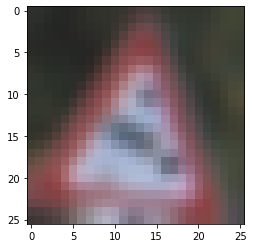

In [39]:
for i in range(10):
    display(blurred[i])

# 2.7 Increasing Brightness

In [40]:
brightness = np.array([np.where(traffic_signs_copy[i] + 20 < traffic_signs_copy[i], 255, traffic_signs_resized[i] + 20) for i in range(len(traffic_signs_resized))])

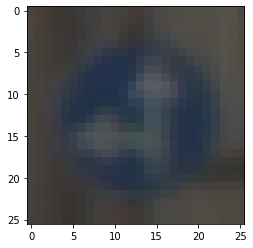

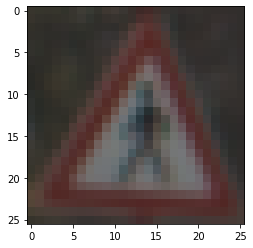

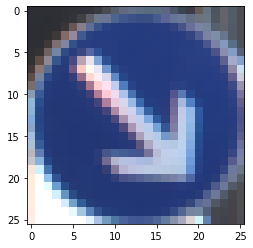

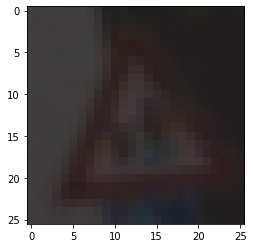

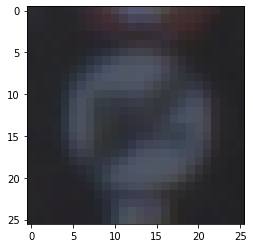

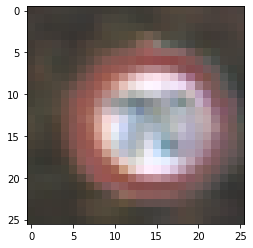

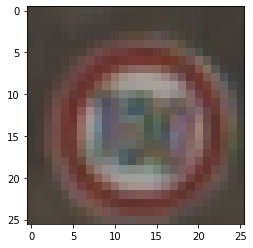

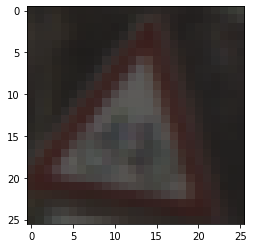

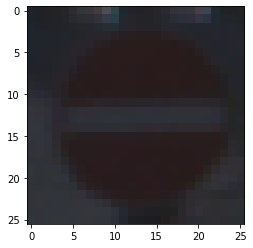

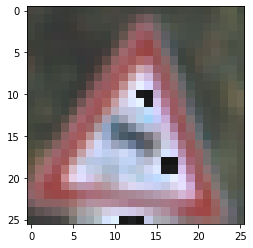

In [41]:
for i in range(10):
    display(brightness[i])

In [42]:
brightness.max()

255

# 2.8 Color Inversion

In [43]:
inverted = np.array([invert(traffic_signs_resized[i]) for i in range(len(traffic_signs_resized))])

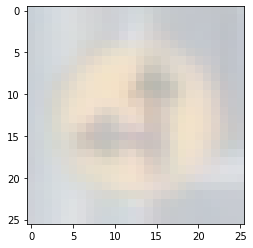

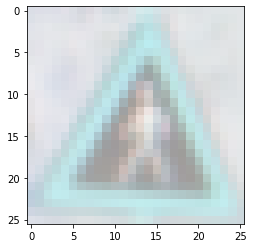

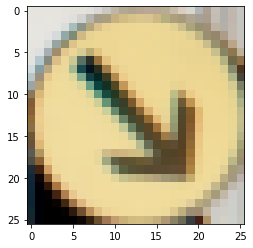

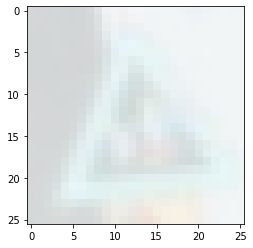

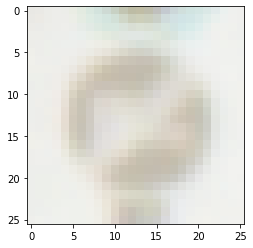

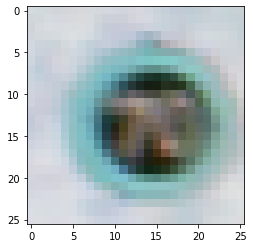

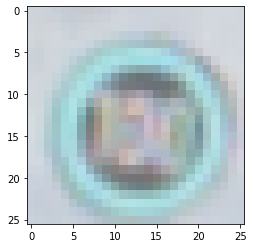

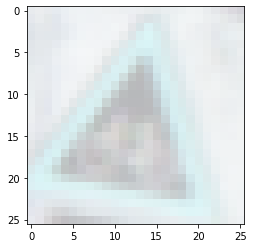

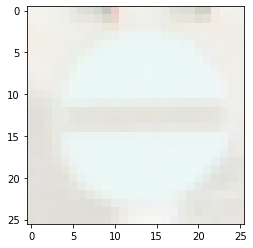

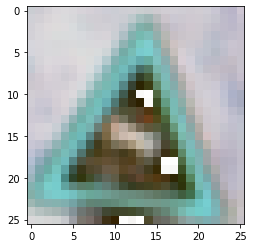

In [44]:
for i in range(10):
    display(inverted[i])

In [50]:
def make_dataframe(data, l):
    d = np.array([data[i].ravel() for i in range(len(data))])
    result = pd.DataFrame(d)
    result['label'] = l
    return result

In [51]:
#rotation_30_deg_df = make_dataframe(rotation_30_deg, labels)
#rotation_30_deg_inv_df = make_dataframe(rotation_30_deg_inv, labels)
#rotation_45_deg_df = make_dataframe(rotation_45_deg, labels)

In [57]:
#rotation_45_deg_inv_df = make_dataframe(rotation_45_deg_inv.astype(np.uint8), labels)
#sheared_pos_df = make_dataframe(sheared_pos, labels)
#sheared_neg_df = make_dataframe(sheared_neg, labels)

MemoryError: Unable to allocate 201. MiB for an array with shape (104029, 2028) and data type uint8

In [ ]:
#warped_x_pos_df = make_dataframe(warped_x_pos, labels)
#warped_x_neg_df = make_dataframe(warped_x_neg, labels)
#noise_df = make_dataframe(noise, labels)

In [ ]:
#blurred_df = make_dataframe(blurred, labels)
#brightness_df = make_dataframe(brightness, labels)
#inverted_df = make_dataframe(inverted, labels)

# 3. Normalization

In [13]:
tf_train_rgb = tf_train.copy()
tf_val_rgb = tf_val.copy()
tf_test_rgb = tf_test.copy()

Our data is RGB, but we will make it grayscale and normalized with different techniques. However, we will keep a copy of the raw data in order to train our first model. The normalized data will be used to extract features later in the process.

# 3.1 Grayscaling 

In [14]:
def grayscale(images):
    data = np.array([cv.cvtColor(images[i], cv.COLOR_RGB2GRAY) for i in range(len(images))], dtype=np.uint8)
    return data

In [15]:
tf_train = grayscale(tf_train)
tf_val = grayscale(tf_val)
tf_test = grayscale(tf_test)

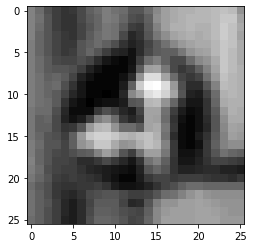

In [16]:
plt.imshow(tf_train[0], cmap='gray')

# 3.2 Histogram Equalization

In [17]:
def histogram_equalization(images):
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
    data = np.array([clahe.apply(images[i]) for i in range(len(images))])
    return data

In [18]:
tf_train = histogram_equalization(tf_train)
tf_val = histogram_equalization(tf_val)
tf_test = histogram_equalization(tf_test)

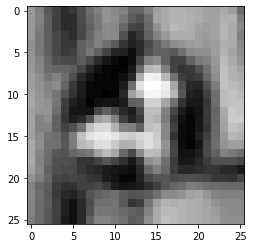

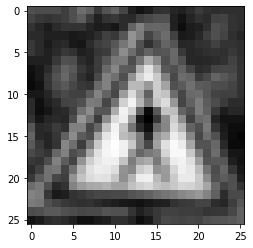

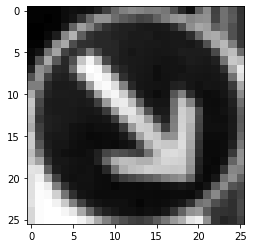

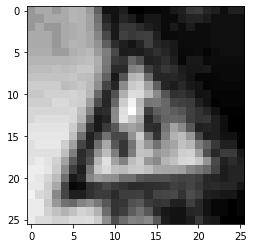

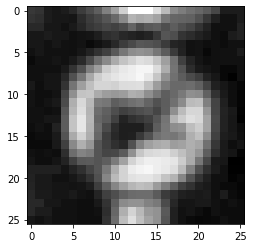

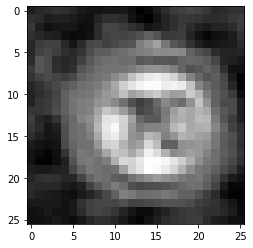

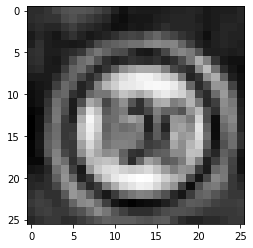

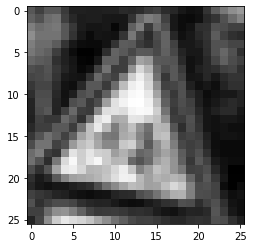

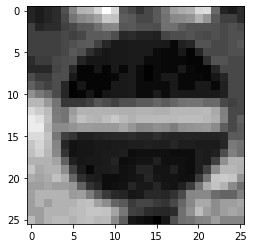

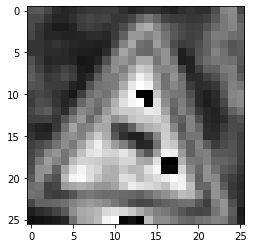

In [19]:
for i in range(10):
    plt.imshow(tf_train[i], cmap='gray')
    plt.show()

# 3.3 /255 Normalization

In [20]:
tf_train.dtype

dtype('uint8')

In [21]:
tf_train = tf_train.astype(np.float32)
tf_val = tf_val.astype(np.float32)
tf_test = tf_test.astype(np.float32)

In [22]:
tf_train /= 255.0
tf_val /= 255.0
tf_test /= 255.0

In [23]:
tf_train.shape

(86989, 26, 26)

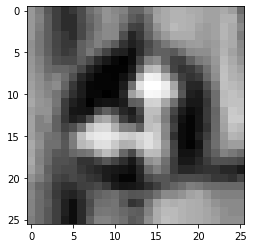

In [24]:
plt.imshow(tf_train[0], cmap='gray')

# 3.4 Mean Normalization

In [25]:
mean_image = np.mean(tf_train, axis=0)

In [26]:
tf_train -= mean_image
tf_val -= mean_image
tf_test -= mean_image

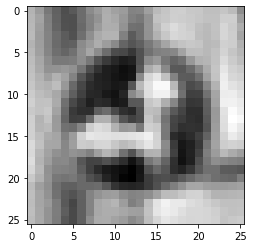

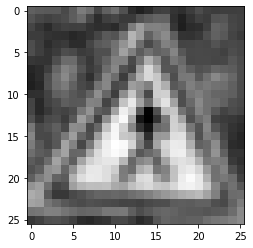

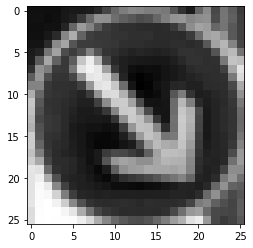

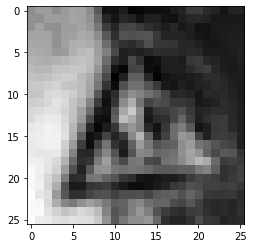

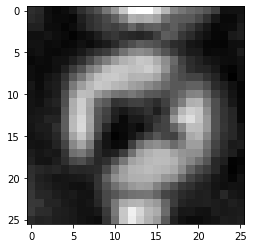

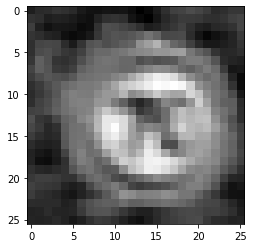

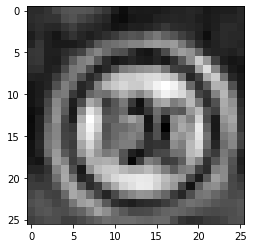

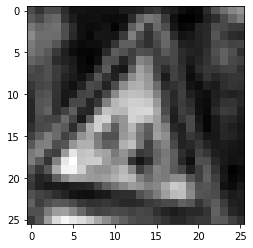

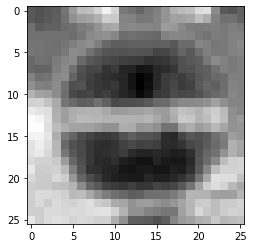

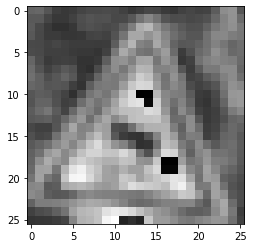

In [27]:
for i in range(10):
    plt.imshow(tf_train[i], cmap='gray')
    plt.show()

# 4. Model training

First, we will use the raw data and make it into a DataFrame.

We have train, validation and test splits, so we don't need to do train/test split. 

In [32]:
raw_data = np.array([tf_train_rgb[i].ravel() for i in range(len(tf_train_rgb))])

In [33]:
raw_data = pd.DataFrame(raw_data)

In [34]:
raw_data

,0,1,2,3,4,5,6,7,8,9,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,55,47,40,51,43,37,46,39,33,42,...,47,57,53,46,57,53,46,57,52,46
1,36,33,25,34,33,24,34,32,24,34,...,33,53,35,32,51,37,33,50,40,35
2,25,27,32,25,27,32,26,27,33,26,...,58,44,47,56,49,47,52,57,58,64
3,43,40,39,44,41,40,44,41,40,43,...,11,13,9,9,13,9,9,13,9,9
4,22,23,27,21,22,26,19,19,23,18,...,18,15,14,17,14,14,17,14,14,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86984,120,127,132,120,128,129,123,131,132,122,...,98,106,104,104,110,105,109,109,105,113
86985,234,234,245,237,237,245,242,242,246,241,...,248,248,248,248,248,248,248,248,248,248
86986,202,198,194,201,199,195,189,188,185,171,...,35,80,42,39,76,49,46,69,53,49
86987,198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198


Because there are many features, we will do PCA with 95% of the varience and hope to decrease the dimensionality.

In [36]:
pca = PCA(0.95)
pca.fit(raw_data)

PCA(n_components=0.95)

In [37]:
pca.n_components_

99

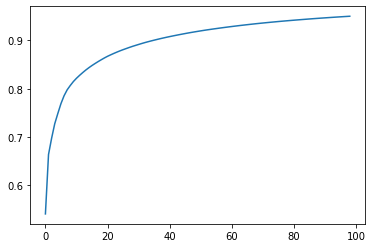

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

PCA did a pretty good job at reducing the dimensionality. Now, we will trasform our splits and train our first model.

In [39]:
x_train = pca.transform(raw_data)
x_val = pca.transform(pd.DataFrame(np.array([tf_val_rgb[i].ravel() for i in range(len(tf_val_rgb))])))
x_test = pca.transform(pd.DataFrame(np.array([tf_test_rgb[i].ravel() for i in range(len(tf_test_rgb))])))

First, we will do Logistic Regression on the raw data as a **baseline**.

We will use GridSearch to optimize hyperparameters and use cross-validation. As a scoring metric, we will use f1 score. The most important parameter in Logistic Regression is C which is responsible for the regularization. As C decreases, the regularization increases.

In [42]:
model = LogisticRegression()

In [43]:
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'max_iter': [150],
}

In [44]:
grid_search_baseline = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='f1_micro', n_jobs=2)

In [45]:
grid_search_baseline.fit(x_train, labels_train)

C:\Users\admid\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [150],
                         'solver': ['saga']},
             scoring='f1_micro')

In [48]:
grid_search_baseline.cv_results_

{'mean_fit_time': array([172.35132837, 169.15581052, 169.71538933, 169.9729681 ,
        167.91218527]),
 'std_fit_time': array([1.94207119, 0.16064221, 0.24096631, 0.06109894, 3.64444509]),
 'mean_score_time': array([0.06635213, 0.04466351, 0.04052011, 0.04067262, 0.03900488]),
 'std_score_time': array([0.01987955, 0.0040231 , 0.00225742, 0.00046992, 0.00141333]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[150, 150, 150, 150, 150],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['saga', 'saga', 'saga', 'saga', 'saga'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'max_iter': 150, 'solver': 'saga'},
  {'C': 0.1, 'max_iter': 150, 'solver': 'saga'},
  {

The cv results give detailed information about the process. Let's see who is the best estimator.

In [47]:
grid_search_baseline.best_estimator_

LogisticRegression(C=0.1, max_iter=150, solver='saga')

The best estimator has a little regularization.

In [52]:
lr_best = grid_search_baseline.best_estimator_

In [46]:
list(zip(grid_search_baseline.cv_results_["params"], grid_search_baseline.cv_results_["split0_test_score"]))

[({'C': 0.01, 'max_iter': 150, 'solver': 'saga'}, 0.8794013173776598),
 ({'C': 0.1, 'max_iter': 150, 'solver': 'saga'}, 0.879470290030003),
 ({'C': 1, 'max_iter': 150, 'solver': 'saga'}, 0.879470290030003),
 ({'C': 10, 'max_iter': 150, 'solver': 'saga'}, 0.8794358037038315),
 ({'C': 100, 'max_iter': 150, 'solver': 'saga'}, 0.8795047763561747)]

Now, lets test the model on the training data first, then on the test data and see what results we can achieve.

In [61]:
print(classification_report(labels_train, lr_best.predict(x_train)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2023
           1       0.91      0.85      0.88      2023
           2       0.90      0.84      0.87      2023
           3       0.84      0.88      0.86      2023
           4       0.90      0.86      0.88      2023
           5       0.82      0.80      0.81      2023
           6       0.88      0.97      0.93      2023
           7       0.88      0.85      0.87      2023
           8       0.81      0.88      0.84      2023
           9       0.93      0.87      0.90      2023
          10       0.94      0.96      0.95      2023
          11       0.91      0.85      0.88      2023
          12       0.99      0.98      0.99      2023
          13       0.96      0.95      0.96      2023
          14       0.97      0.97      0.97      2023
          15       0.93      0.92      0.93      2023
          16       0.96      0.98      0.97      2023
          17       0.96    

In [53]:
print(classification_report(labels_test, lr_best.predict(x_test)))

              precision    recall  f1-score   support

           0       0.25      0.45      0.32        60
           1       0.84      0.82      0.83       720
           2       0.83      0.80      0.82       750
           3       0.75      0.79      0.77       450
           4       0.86      0.75      0.80       660
           5       0.76      0.76      0.76       630
           6       0.89      0.67      0.77       150
           7       0.80      0.68      0.73       450
           8       0.68      0.75      0.71       450
           9       0.89      0.83      0.86       480
          10       0.89      0.91      0.90       660
          11       0.83      0.82      0.83       420
          12       0.98      0.90      0.94       690
          13       0.95      0.96      0.95       720
          14       0.98      0.93      0.95       270
          15       0.76      0.83      0.79       210
          16       0.77      0.98      0.86       150
          17       0.91    

Our model has 90% accuracy on the train data and 81% on the test data. However, the labels 0, 20, 21, 24, 27 have much lower accuracy than the other labels. Let's see why is that.

The code below takes random sample from the test data of one of the weak classes and shows the probability.

With this chunk of code below, we can see with which labels our model mistakens the labels with the lowest accuracy.

In [177]:
for n in [0, 20, 21, 24, 27]:
    curr = []
    for i, s in list(enumerate(labels_test)):
        if s == n:
            curr.append(i)
    print(n)
    print(pd.Series([lr_best.predict_proba(x_test[curr[random.randrange(10)]].reshape(1, -1))[0][i] for i in range(43)]).sort_values(ascending=False)[:5])
    

0
4    0.025467
2    0.012693
1    0.008388
0    0.004586
3    0.000088
dtype: float64
20
20    0.995131
1     0.096794
28    0.073999
27    0.000196
23    0.000065
dtype: float64
21
21    0.950251
34    0.094611
24    0.000399
31    0.000092
22    0.000011
dtype: float64
24
42    0.998033
23    0.562470
31    0.268019
24    0.031528
29    0.021682
dtype: float64
27
30    0.997834
29    0.057125
11    0.008856
24    0.006873
21    0.004333
dtype: float64


To have a real perception what the model is missing, here are the classes with their description and image of the class.

In [178]:
l = []
for i in range(43):
    for j in range(len(labels_test)):
        if labels_test[j] == i:
            l.append(j)
            break

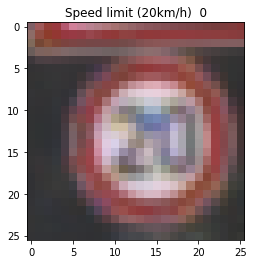

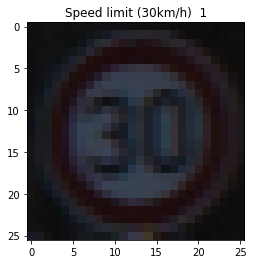

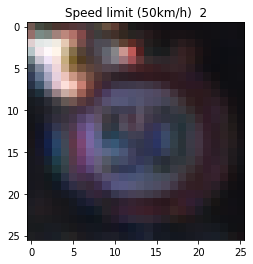

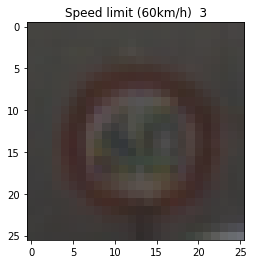

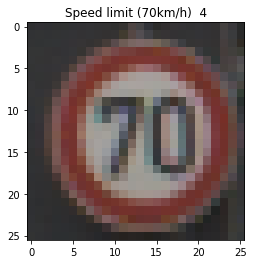

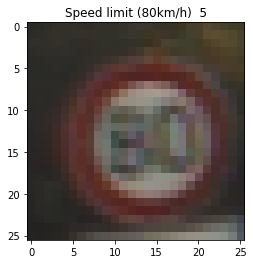

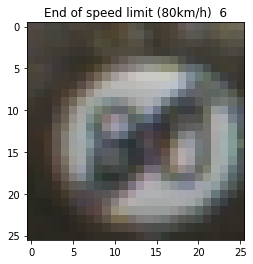

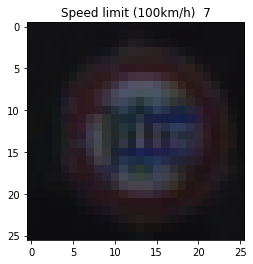

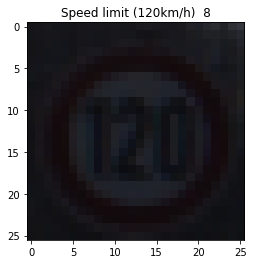

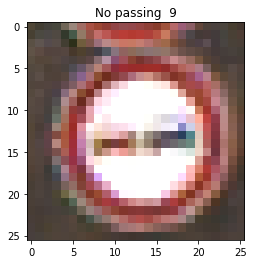

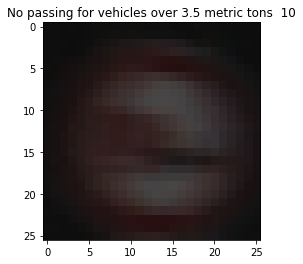

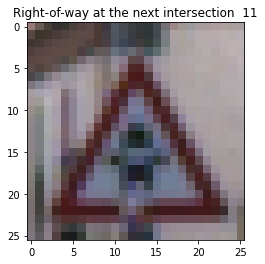

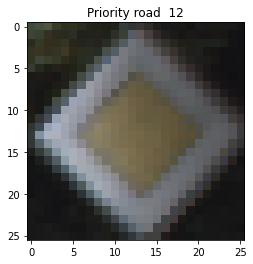

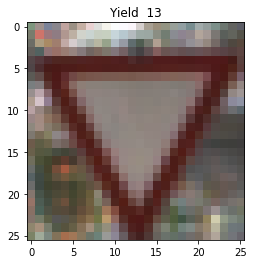

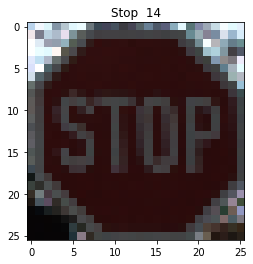

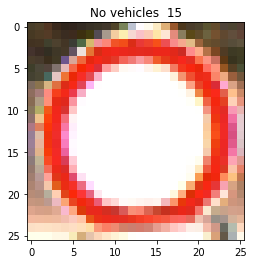

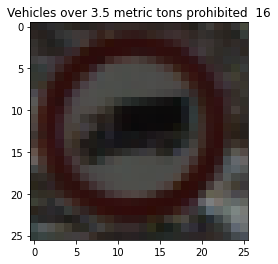

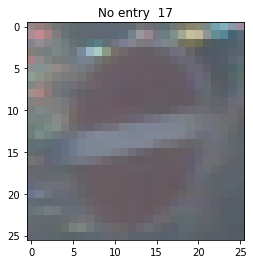

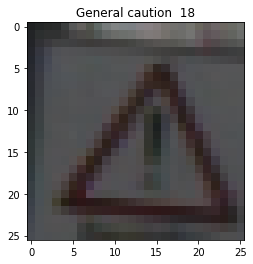

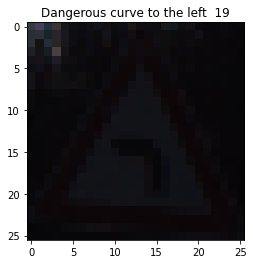

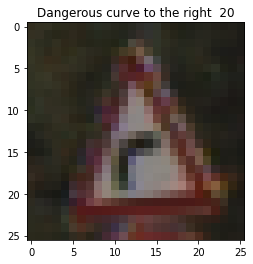

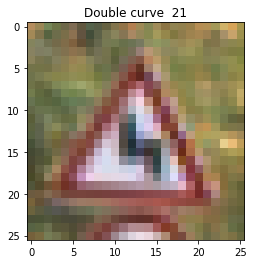

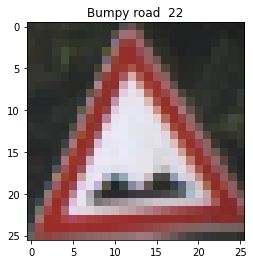

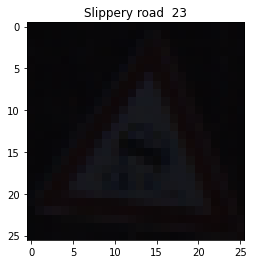

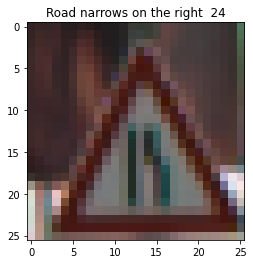

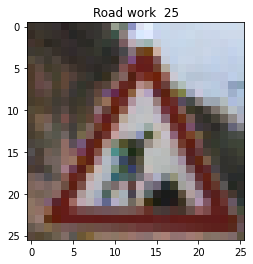

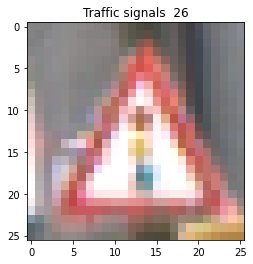

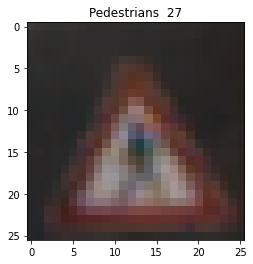

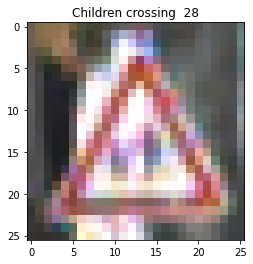

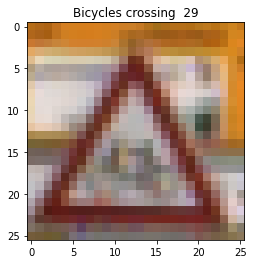

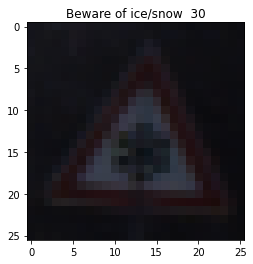

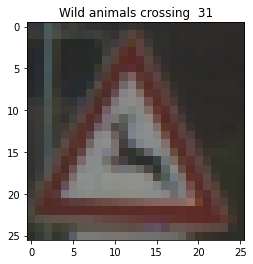

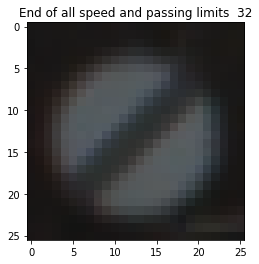

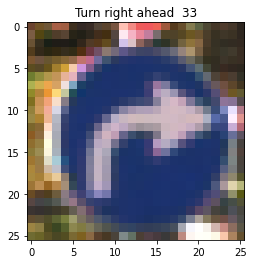

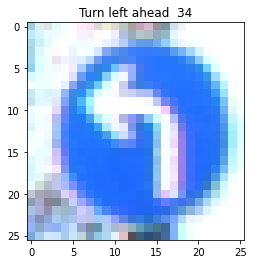

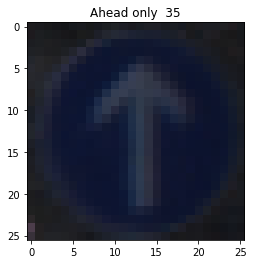

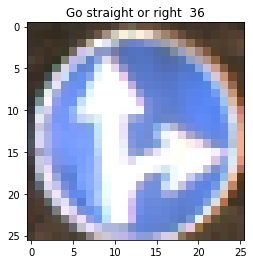

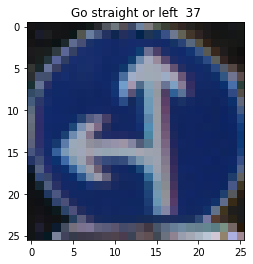

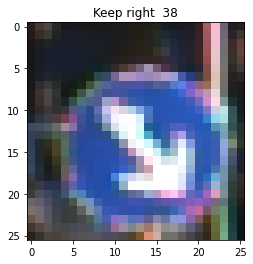

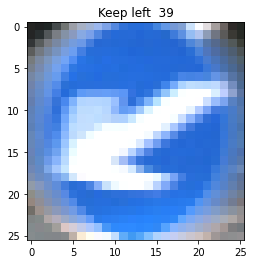

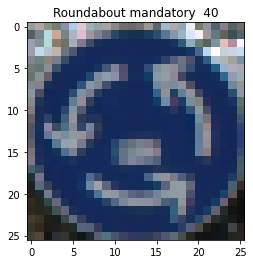

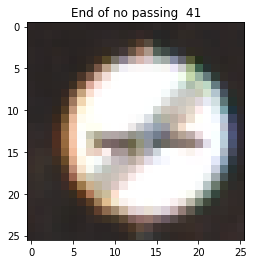

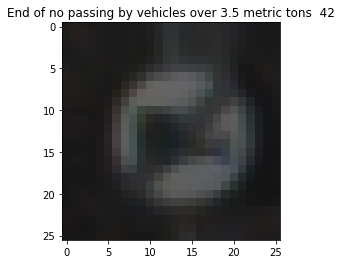

In [179]:
for i, img in enumerate(l):
    plt.title(labels_names.SignName[i] + f'  {i}')
    display(tf_test_rgb[img].astype(np.uint8))

Now, we will try to increase the accuracy by feature extraction.

# 5. Feature extraction

# 5.1 Sobel

In [28]:
def sobel_detection(images):
    detected = np.array([sobel(image) for image in images.copy()])
    return detected

In [29]:
sobel_train = sobel_detection(tf_train)
sobel_val = sobel_detection(tf_val)
sobel_test = sobel_detection(tf_test)

In [30]:
sobel_train.shape

(86989, 26, 26)

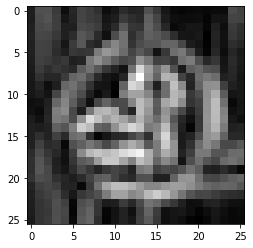

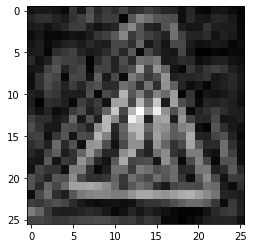

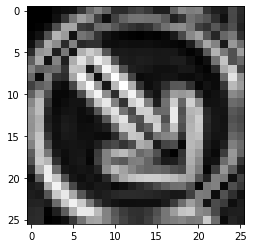

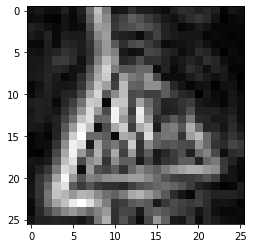

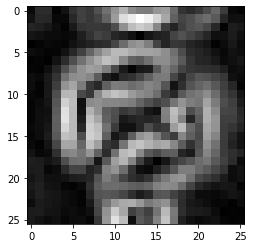

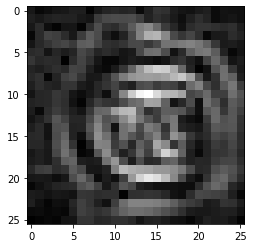

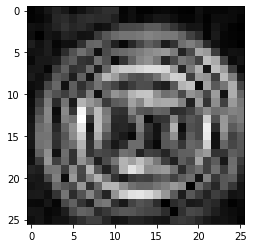

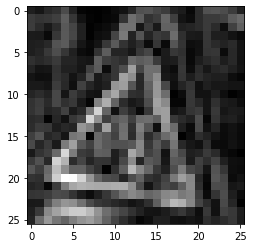

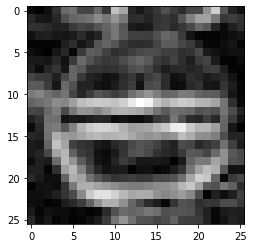

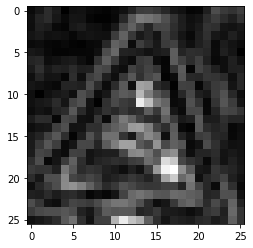

In [31]:
for i in range(10):
    plt.imshow(sobel_train[i], cmap='gray')
    plt.show()

# 5.2 Canny

In [32]:
def canny_detection(images):
    detected = np.array([canny(images[i], sigma=0.5,low_threshold=0.5, high_threshold=0.8) for i in range(len(images))])
    return detected

In [33]:
canny_train = canny_detection(tf_train)
canny_val = canny_detection(tf_val)
canny_test = canny_detection(tf_test)

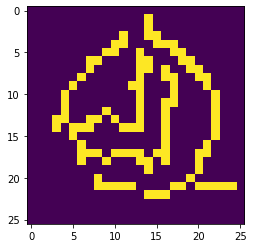

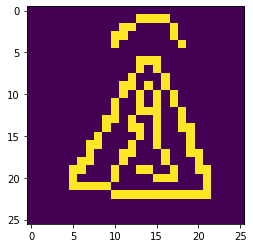

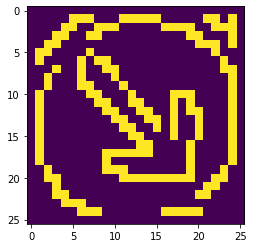

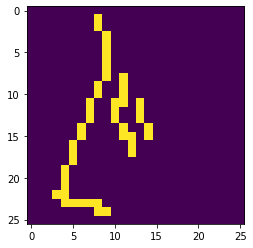

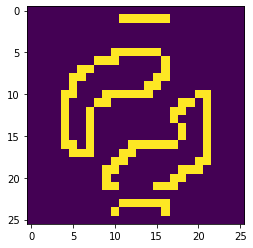

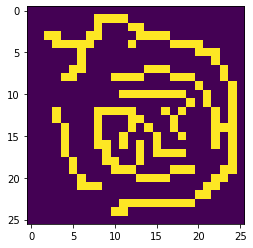

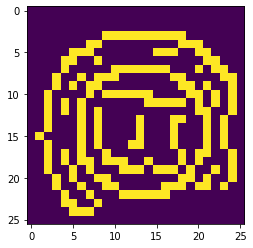

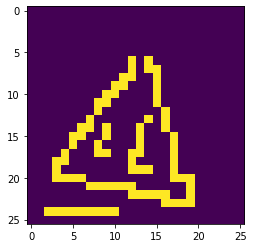

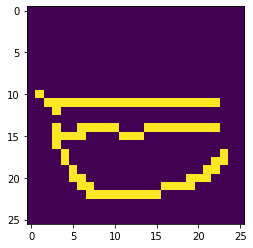

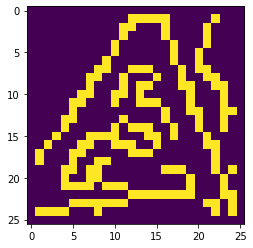

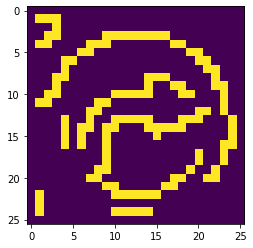

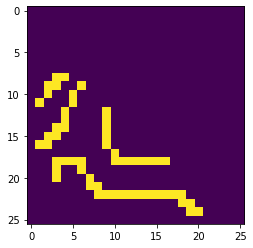

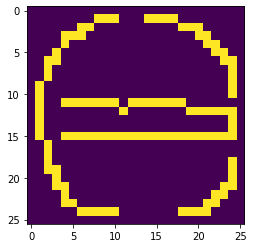

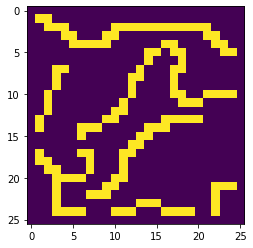

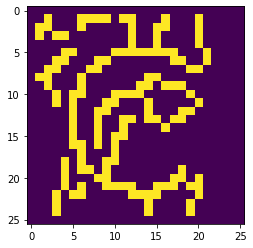

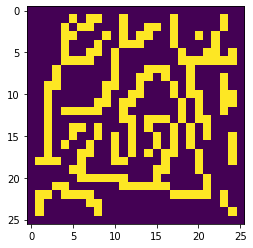

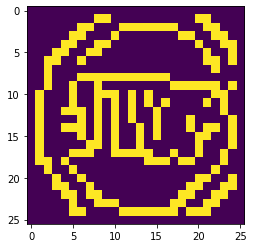

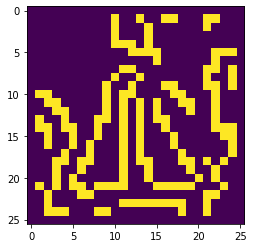

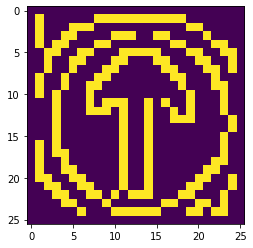

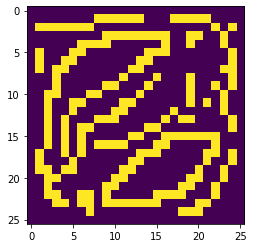

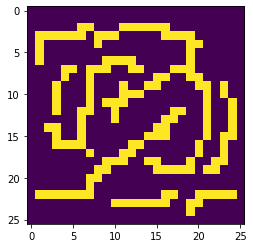

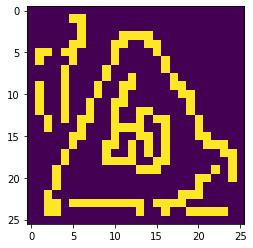

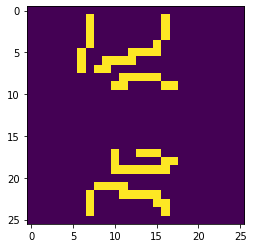

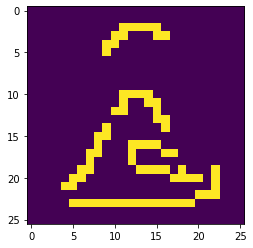

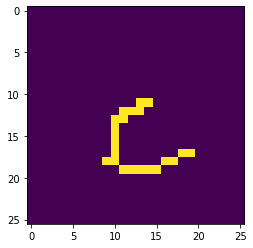

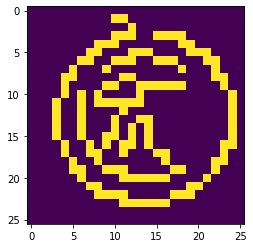

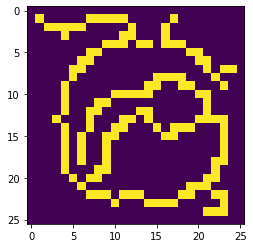

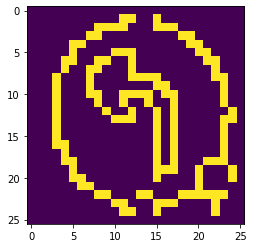

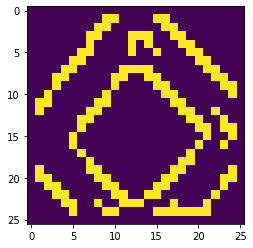

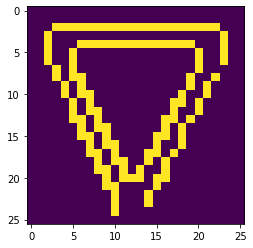

In [34]:
for i in range(30):
    plt.imshow(canny_train[i])
    plt.show()

# 5.3 Harris Corner Detection

In [35]:
def corner_detection_harris(images):
    detected = np.array([cv.dilate(cv.cornerHarris(images[i],2,3,0.04), None) for i in range(len(images))])
    return detected

In [36]:
corner_harris_train = corner_detection_harris(tf_train)
corner_harris_val = corner_detection_harris(tf_val)
corner_harris_test = corner_detection_harris(tf_test)

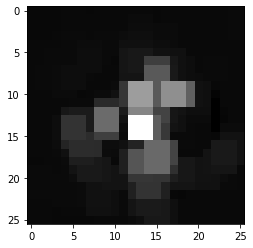

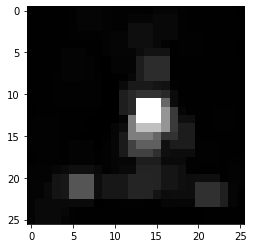

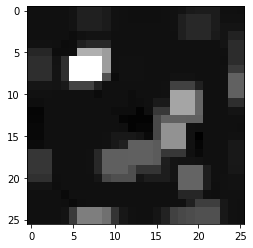

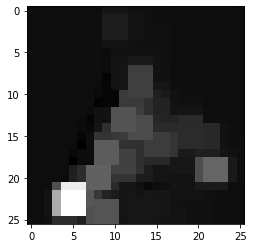

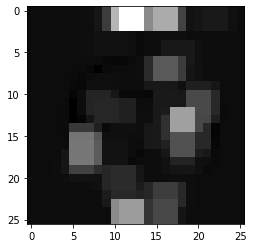

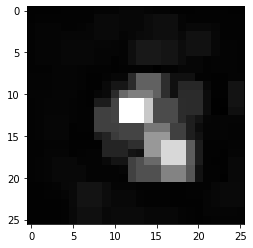

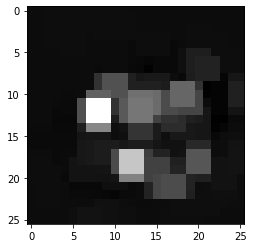

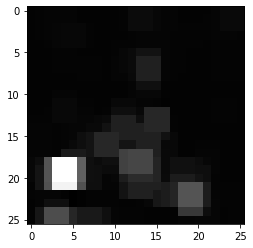

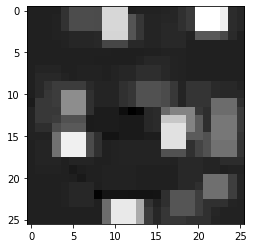

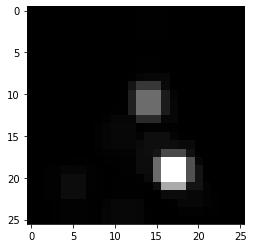

In [37]:
for i in range(10):
    plt.imshow(corner_harris_train[i], cmap='gray')
    plt.show()

# 5.4 Blob Detection

C:\Users\admid\anaconda3\lib\site-packages\skimage\feature\blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
C:\Users\admid\anaconda3\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
C:\Users\admid\anaconda3\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
C:\Users\admid\anaconda3\lib\site-packages\skimage\feature\blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


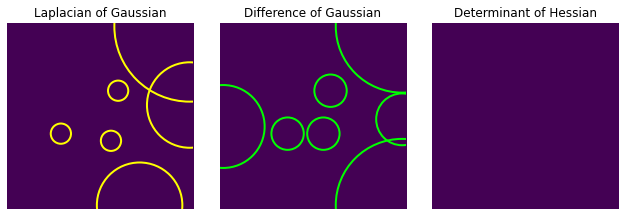

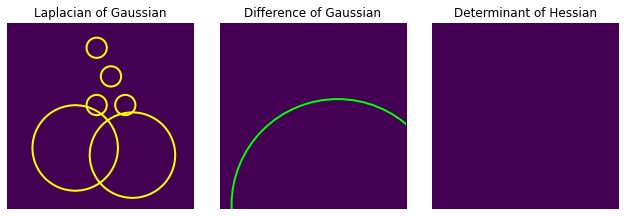

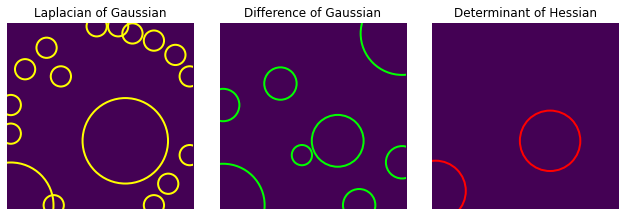

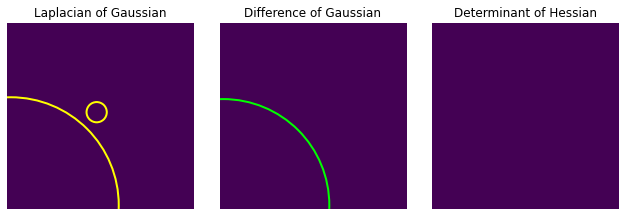

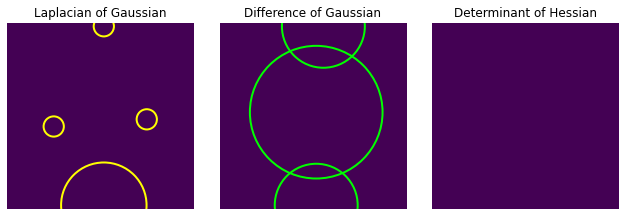

C:\Users\admid\anaconda3\lib\site-packages\skimage\feature\blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
C:\Users\admid\anaconda3\lib\site-packages\skimage\feature\blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)


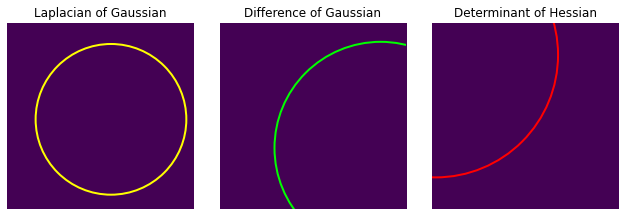

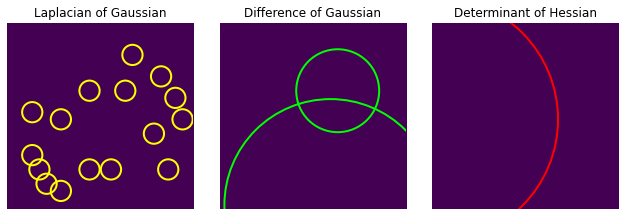

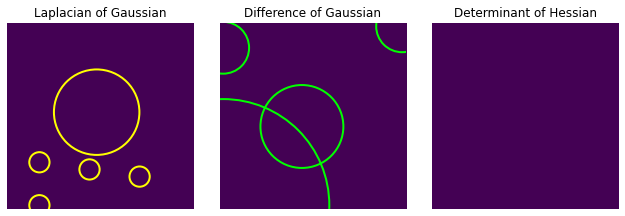

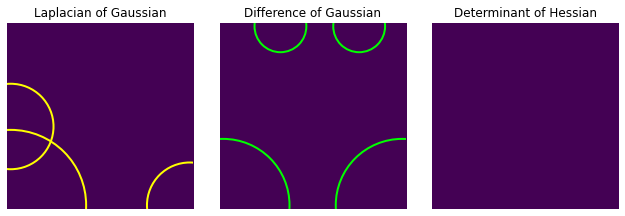

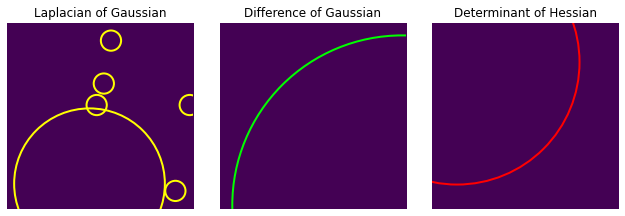

In [38]:
for i in range(10):
    img = np.zeros((26, 26, 1), dtype=np.uint8)

    blobs_l = blob_log(tf_train[i], max_sigma=30, num_sigma=10, threshold=.1)

    # Compute radii in the 3rd column.
    blobs_l[:, 2] = blobs_l[:, 2] * np.sqrt(2)

    blobs_d = blob_dog(tf_train[i], max_sigma=30, threshold=.1)
    blobs_d[:, 2] = blobs_d[:, 2] * np.sqrt(2)

    blobs_dh = blob_doh(((tf_train[i]+mean_image)*255).astype(np.uint8), max_sigma=30, threshold=.01)

    blobs_list = [blobs_l, blobs_d, blobs_dh]
    colors = ['yellow', 'lime', 'red']
    titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
              'Determinant of Hessian']
    sequence = zip(blobs_list, colors, titles)

    fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
    ax = axes.ravel()

    for idx, (blobs, color, title) in enumerate(sequence):
        ax[idx].set_title(title)
        ax[idx].imshow(img)
        for blob in blobs:
            y, x, r = blob
            c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
            ax[idx].add_patch(c)
        ax[idx].set_axis_off()

    plt.tight_layout()
    plt.show()

Here we show the tree approaches to detect blobs, but we will use only the Laplacian of Gaussian, because it seems to detect more features and more accurate features.

In [39]:
def blob_detection(images):
    detected = np.array([blob_log(images[i], max_sigma=30, num_sigma=10, threshold=.1) for i in range(len(images))])
    for bl in detected:
        for b in bl:
            b[2] = b[2] * np.sqrt(2)
    result = []
    for i in range(len(detected)):
        img = np.zeros((26, 26, 1), dtype=np.uint8)
        blo = detected[i]
        for x, y, r in blo:
            cv.circle(img, (int(y), int(x)), int(r), (255, 255, 255), 0)
        result.append(img)
    result = np.array(result)
    return result

In [40]:
blobs_train = blob_detection(tf_train)
blobs_val = blob_detection(tf_val)
blobs_test = blob_detection(tf_test)

<ipython-input-39-b21c2ad5fdfd>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  detected = np.array([blob_log(images[i], max_sigma=30, num_sigma=10, threshold=.1) for i in range(len(images))])


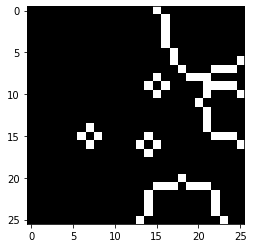

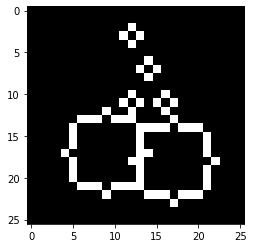

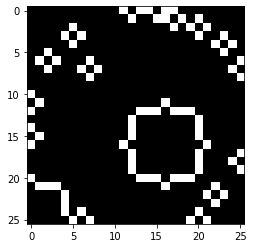

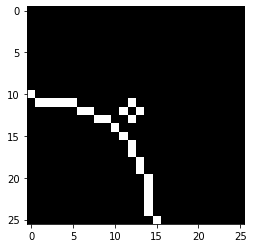

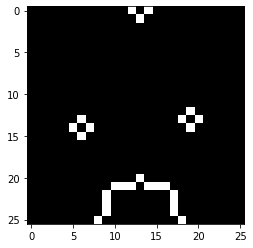

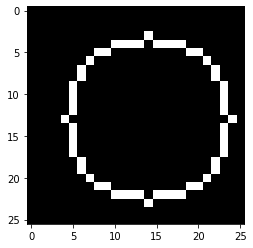

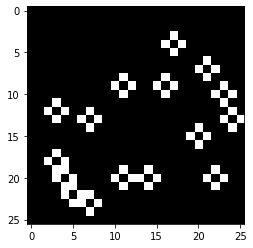

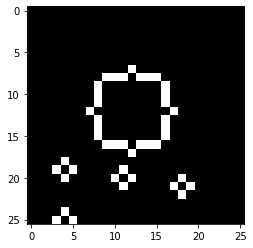

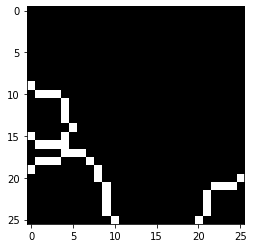

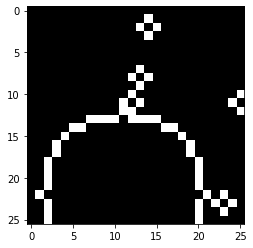

In [41]:
for i in range(10):
    plt.imshow(blobs_train[i], cmap='gray')
    plt.show()

# 5.5 Ridge Detection

In [42]:
def ridge_detection(images):
    detected = np.array([frangi(images[i], black_ridges=False) for i in range(len(images))])
    return detected

In [43]:
ridges_train = ridge_detection(tf_train)
ridges_val = ridge_detection(tf_val)
ridges_test = ridge_detection(tf_test)

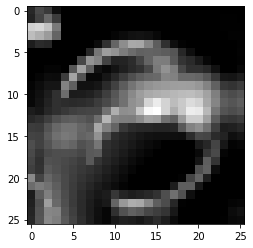

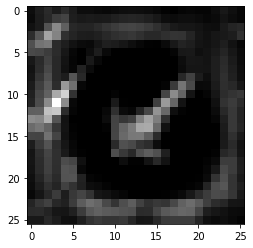

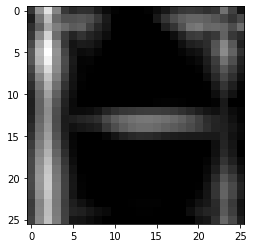

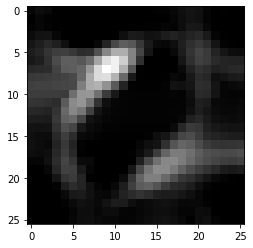

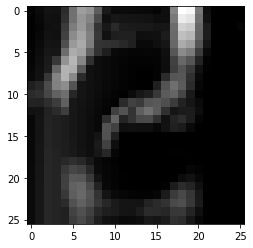

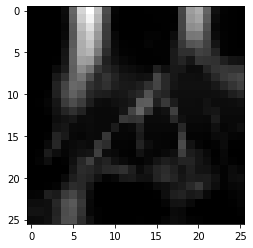

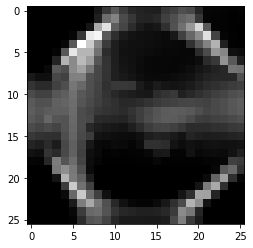

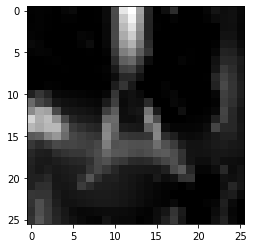

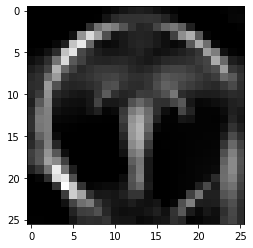

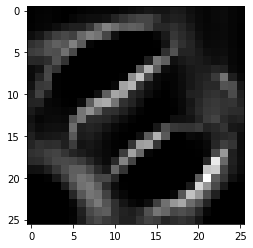

In [44]:
for i in range(10, 20):  
    plt.imshow(ridges_train[i], cmap='gray')
    plt.show()

# 5.6 HOG

In [45]:
descriptor, hog_image = hog(tf_train[0], orientations=9, pixels_per_cell=(4, 4), cells_per_block=(1, 1), feature_vector=True, visualize=True)

In [46]:
descriptor.shape

(324,)

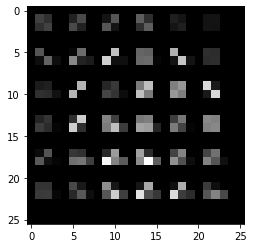

In [47]:
plt.imshow(hog_image, cmap='gray')

In [48]:
def hog_detection(images):
    detected = np.array([hog(images[i], orientations=9, pixels_per_cell=(4, 4), cells_per_block=(1, 1), feature_vector=True) for i in range(len(images))])
    return detected

In [49]:
hog_train = hog_detection(tf_train)
hog_val = hog_detection(tf_val)
hog_test = hog_detection(tf_test)

In [50]:
hog_train.shape

(86989, 324)

# 6. Model training with combinations of features.

Now, when we extracted features, we will combine some of them and try to fit a model and see what results we will receive. Are they going to be better than before or worse?

For now, there will be only 2 combinations with 3 different features.

### #TODO: Make more combinations and train models on them

In [51]:
def combine(features):
    combination = []
    for feature in features:
        combination.append(pd.DataFrame(np.array([feature[i].ravel() for i in range(len(feature))])))
    result = pd.concat(combination, axis=1)
    return result

# 6.1 Combination 1

In the first combination, we will use Sobel, Ridges and HOG features.

In [52]:
combination1_train = combine([sobel_train, ridges_train, hog_train])

In [53]:
combination1_train

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
0,0.035239,0.089153,0.090438,0.065072,0.016603,0.044572,0.076225,0.069213,0.055222,0.015039,...,0.060216,0.000000,0.000000,0.000000,0.440348,0.516646,0.516646,0.516646,0.000000,0.072961
1,0.027617,0.036080,0.037758,0.030794,0.014746,0.078921,0.032964,0.113144,0.056054,0.089290,...,0.000000,0.377964,0.377964,0.377964,0.377964,0.377964,0.000000,0.000000,0.377964,0.377964
2,0.003008,0.004173,0.002577,0.025225,0.035183,0.042274,0.120644,0.230749,0.285696,0.219641,...,0.000000,0.246517,0.566054,0.566054,0.538111,0.000000,0.000000,0.000000,0.000000,0.093976
3,0.013781,0.018737,0.011943,0.012453,0.025486,0.008240,0.026081,0.082837,0.145219,0.092201,...,0.000000,0.470675,0.470675,0.470675,0.216452,0.470675,0.134419,0.000000,0.221220,0.000000
4,0.010731,0.044487,0.044263,0.003933,0.018776,0.049840,0.063803,0.056602,0.079986,0.108547,...,0.000000,0.507863,0.243841,0.544686,0.000000,0.544686,0.230287,0.000000,0.143969,0.124465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86984,0.015679,0.031222,0.034705,0.022327,0.022175,0.020320,0.032971,0.037108,0.069411,0.040939,...,0.326026,0.452965,0.301819,0.268163,0.452965,0.000000,0.124767,0.452965,0.452965,0.026829
86985,0.069002,0.059885,0.043982,0.071778,0.107650,0.089290,0.109760,0.178979,0.235576,0.232898,...,0.000000,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
86986,0.010737,0.041895,0.088854,0.128323,0.140540,0.104074,0.152348,0.210157,0.255333,0.268645,...,0.173699,0.000000,0.000000,0.421649,0.421649,0.421649,0.000000,0.333256,0.421649,0.421649
86987,0.003008,0.003350,0.003186,0.003933,0.036254,0.120086,0.222397,0.226173,0.006667,0.162832,...,0.000000,0.019680,0.747667,0.663782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
combination1_test = combine([sobel_test, ridges_test, hog_test])

Again, we use PCA because of the high dimensionality.

In [55]:
pca2 = PCA(0.95)
pca2.fit(combination1_train)

PCA(n_components=0.95)

In [56]:
comb1_train = pca2.transform(combination1_train)

In [57]:
comb1_test = pca2.transform(combination1_test)

In [58]:
pca2.n_components_

476

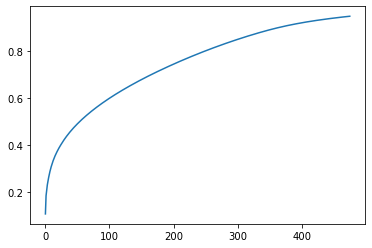

In [59]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.show()

This time, we didn't reduce the dimensionality as much as we want, but we will train models on the trasformed data anyway.

Again, the process repeats as above.

In [289]:
linear_model = LogisticRegression()

In [290]:
params_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'max_iter': [150],
}

In [291]:
grid_search_logistic_regression = GridSearchCV(estimator=linear_model, param_grid=params_lr, cv=3, scoring='f1_micro', n_jobs=2)

In [295]:
grid_search_logistic_regression.fit(comb1_train, labels_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [150],
                         'solver': ['saga']},
             scoring='f1_micro')

In [296]:
grid_search_logistic_regression.cv_results_

{'mean_fit_time': array([ 95.40042337,  93.02510222, 127.22109811, 552.69234888,
        865.58563193, 817.75496443]),
 'std_fit_time': array([ 7.50159567,  4.69058981,  4.76581659, 21.73708369,  1.59139242,
        51.35779332]),
 'mean_score_time': array([0.12260906, 0.09075212, 0.09977126, 0.09441566, 0.09420315,
        0.08950965]),
 'std_score_time': array([0.01787856, 0.00103009, 0.00297945, 0.00260538, 0.00427032,
        0.00386373]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[150, 150, 150, 150, 150, 150],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['saga', 'saga', 'saga', 'saga', 'saga', 'saga'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=

In [297]:
grid_search_logistic_regression.best_estimator_

LogisticRegression(C=1, max_iter=150, solver='saga')

This time, our best estimator doesn't apply any regularization.

In [298]:
best_logistic_regressor = grid_search_logistic_regression.best_estimator_

Let's test it, again, first on the train data and then on the test data.

In [299]:
print(classification_report(labels_train, best_logistic_regressor.predict(comb1_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2023
           1       0.96      0.95      0.96      2023
           2       0.96      0.95      0.95      2023
           3       0.94      0.95      0.95      2023
           4       0.97      0.97      0.97      2023
           5       0.92      0.91      0.91      2023
           6       1.00      1.00      1.00      2023
           7       0.98      0.98      0.98      2023
           8       0.95      0.96      0.96      2023
           9       0.99      0.99      0.99      2023
          10       0.99      0.99      0.99      2023
          11       0.97      0.96      0.97      2023
          12       1.00      1.00      1.00      2023
          13       1.00      1.00      1.00      2023
          14       1.00      1.00      1.00      2023
          15       0.99      1.00      0.99      2023
          16       1.00      1.00      1.00      2023
          17       1.00    

In [303]:
print(classification_report(labels_test, best_logistic_regressor.predict(comb1_test)))

              precision    recall  f1-score   support

           0       0.56      0.82      0.67        60
           1       0.86      0.87      0.87       720
           2       0.82      0.89      0.85       750
           3       0.86      0.86      0.86       450
           4       0.93      0.91      0.92       660
           5       0.77      0.70      0.73       630
           6       0.95      0.81      0.87       150
           7       0.90      0.88      0.89       450
           8       0.83      0.82      0.83       450
           9       0.96      0.98      0.97       480
          10       0.96      0.93      0.95       660
          11       0.87      0.81      0.84       420
          12       0.99      0.97      0.98       690
          13       1.00      0.99      0.99       720
          14       0.96      0.93      0.95       270
          15       0.90      0.99      0.95       210
          16       0.97      0.95      0.96       150
          17       1.00    

As we can see, the overall accuracy increased as well as the accuracy of the labels that we had problems above. The difference of the accuracy between the train and test data is 9%, so everything is okay.

# 6.2 Combination 2

This time, we will use a combination of Canny, Corner Harris and Blobs features.

In [305]:
combination2_train = combine([canny_train, corner_harris_train, blobs_train])
combination2_test = combine([canny_test, corner_harris_test, blobs_test])

Again, PCA

In [306]:
pca3 = PCA(0.95)
pca3.fit(combination2_train)

PCA(n_components=0.95)

In [307]:
pca3.n_components_

420

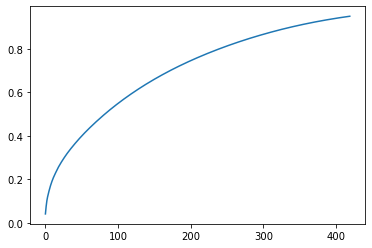

In [308]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))

In [310]:
comb2_train = pca3.transform(combination2_train)
comb2_test = pca3.transform(combination2_test)

Again, GridSearch with the parameters as above.

In [309]:
grid_search_logistic_regression_2 = GridSearchCV(estimator=linear_model, param_grid=params_lr, cv=3, scoring='f1_micro', n_jobs=2)

In [311]:
grid_search_logistic_regression_2.fit(comb2_train, labels_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [150],
                         'solver': ['saga']},
             scoring='f1_micro')

In [312]:
grid_search_logistic_regression_2.cv_results_

{'mean_fit_time': array([354.1548419 , 353.28775605, 353.17404159, 354.53968358,
        351.81749256, 353.27099911]),
 'std_fit_time': array([1.65557395, 4.20161167, 1.95976629, 3.57769349, 4.29850008,
        1.87242418]),
 'mean_score_time': array([0.09837548, 0.0780561 , 0.07790168, 0.07636587, 0.07740704,
        0.07887268]),
 'std_score_time': array([0.01731886, 0.00164082, 0.00203066, 0.00060811, 0.00089346,
        0.0011895 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[150, 150, 150, 150, 150, 150],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['saga', 'saga', 'saga', 'saga', 'saga', 'saga'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object

In [313]:
grid_search_logistic_regression_2.best_estimator_

LogisticRegression(C=0.001, max_iter=150, solver='saga')

This time, our best estimator has regularization.

In [314]:
best_logistic_regressor_2 = grid_search_logistic_regression_2.best_estimator_

Now, let's see if the model with the second combination of features performs better than the model with the first combination of features.

In [315]:
print(classification_report(labels_train, best_logistic_regressor_2.predict(comb2_train)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      2023
           1       0.60      0.48      0.54      2023
           2       0.55      0.48      0.51      2023
           3       0.50      0.45      0.47      2023
           4       0.46      0.38      0.41      2023
           5       0.44      0.36      0.40      2023
           6       0.20      0.77      0.32      2023
           7       0.57      0.49      0.53      2023
           8       0.54      0.39      0.45      2023
           9       0.54      0.41      0.47      2023
          10       0.59      0.46      0.52      2023
          11       0.68      0.53      0.59      2023
          12       0.50      0.51      0.51      2023
          13       0.72      0.70      0.71      2023
          14       0.88      0.85      0.87      2023
          15       0.48      0.47      0.47      2023
          16       0.69      0.68      0.68      2023
          17       0.74    

In [316]:
print(classification_report(labels_test, best_logistic_regressor_2.predict(comb2_test)))

              precision    recall  f1-score   support

           0       0.09      0.27      0.14        60
           1       0.54      0.34      0.42       720
           2       0.42      0.33      0.37       750
           3       0.44      0.37      0.40       450
           4       0.35      0.27      0.31       660
           5       0.37      0.23      0.28       630
           6       0.12      0.41      0.19       150
           7       0.37      0.30      0.33       450
           8       0.47      0.35      0.40       450
           9       0.37      0.28      0.32       480
          10       0.63      0.47      0.54       660
          11       0.61      0.46      0.53       420
          12       0.59      0.42      0.49       690
          13       0.82      0.75      0.78       720
          14       0.78      0.82      0.80       270
          15       0.21      0.23      0.22       210
          16       0.48      0.73      0.58       150
          17       0.59    

From this reports, we can conclude that the first combination of features is much better that the second. We will use the first set of features in training stronger and more complicated models.

With that, we can say that we can end with the basic logistic regression. We increased the accuracy on the classes that bothered us, but on the train data the model almost doesn't make a mistake, while on the test data it performs on average 89%. We performed cross validation on every single algorythm, so the most relevant diagnoses for the logistic regressor with the first combnation of features is that that is the limit of this model on this data. As we know, some of the signs differentiate on only a small amount of pixels, but because of the low qualitiy of the pictures it might be hard for the logistic regressor to separate them.

# 7 Stronger models

## 7.1 Support Vector Machine

The first **SVM** will be linear and the second will be kernel.

We expect the Linear SVM to have simillar results as the best logistic regressor, because the two models do almost the same job. Let's see.

In [321]:
params_lsvm = {
    'C': [0.01, 0.1, 1, 10, 100],
}

In [322]:
linear_svm = LinearSVC()

In [323]:
grid_search_linear_svm = GridSearchCV(estimator=linear_svm, param_grid=params_lsvm, scoring='f1_micro', cv=3, n_jobs=2)

In [324]:
grid_search_linear_svm.fit(comb1_train, labels_train)

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='f1_micro')

In [325]:
grid_search_linear_svm.cv_results_

{'mean_fit_time': array([ 24.86305221,  29.82059336,  76.95791626, 109.6092933 ,
        123.30394785]),
 'std_fit_time': array([0.85432751, 0.23249931, 0.30502857, 2.36390157, 4.51152966]),
 'mean_score_time': array([0.14084983, 0.09392238, 0.09719435, 0.09313273, 0.09374293]),
 'std_score_time': array([3.74783483e-02, 3.65334561e-03, 5.18383100e-03, 1.49971106e-03,
        9.56121590e-06]),
 'param_C': masked_array(data=[0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.94195951, 0.95009829, 0.94696003, 0.93709694, 0.92492327]),
 'split1_test_score': array([0.94012967, 0.95040695, 0.94726859, 0.93943992, 0.92726583]),
 'split2_test_score': array([0.94361291, 0.9533039 , 0.9499931 , 0.9406125 , 0.92612774]),
 'mean_test_score': array([0.9419007 , 0.95126971, 0.94807391, 0.93904979, 0.92610561]),
 'std_te

In [326]:
grid_search_linear_svm.best_estimator_

LinearSVC(C=0.1)

In [327]:
best_linear_svm = grid_search_linear_svm.best_estimator_

In [328]:
print(classification_report(labels_train, best_linear_svm.predict(comb1_train)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2023
           1       0.94      0.90      0.92      2023
           2       0.93      0.92      0.93      2023
           3       0.91      0.93      0.92      2023
           4       0.96      0.95      0.95      2023
           5       0.90      0.81      0.85      2023
           6       0.99      1.00      0.99      2023
           7       0.95      0.96      0.96      2023
           8       0.93      0.94      0.93      2023
           9       0.98      0.97      0.98      2023
          10       0.97      0.98      0.98      2023
          11       0.96      0.92      0.94      2023
          12       0.99      1.00      1.00      2023
          13       1.00      1.00      1.00      2023
          14       0.99      1.00      0.99      2023
          15       0.98      0.99      0.99      2023
          16       0.99      1.00      1.00      2023
          17       1.00    

In [329]:
print(classification_report(labels_test, best_linear_svm.predict(comb1_test)))

              precision    recall  f1-score   support

           0       0.54      0.83      0.66        60
           1       0.86      0.86      0.86       720
           2       0.80      0.89      0.85       750
           3       0.84      0.85      0.85       450
           4       0.91      0.91      0.91       660
           5       0.80      0.63      0.71       630
           6       0.91      0.80      0.85       150
           7       0.88      0.87      0.87       450
           8       0.84      0.78      0.81       450
           9       0.97      0.97      0.97       480
          10       0.94      0.93      0.94       660
          11       0.90      0.79      0.84       420
          12       0.99      0.96      0.97       690
          13       0.99      1.00      0.99       720
          14       0.94      0.94      0.94       270
          15       0.88      0.98      0.93       210
          16       0.95      0.95      0.95       150
          17       0.98    

As we can see, we got a little bit worse results than the best logistic regressor, but nothing that we didn't expect.

Now, let's train Kernel SVM. Let's see if it performs better than the linear models.

In [330]:
kernel_svm = SVC(C=0.1, degree=2)
kernel_svm.fit(comb1_train, labels_train)

SVC(C=0.1, degree=2)

In [331]:
print(classification_report(labels_train, kernel_svm.predict(comb1_train)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2023
           1       0.92      0.83      0.87      2023
           2       0.84      0.87      0.85      2023
           3       0.87      0.87      0.87      2023
           4       0.96      0.91      0.94      2023
           5       0.76      0.79      0.78      2023
           6       0.99      0.99      0.99      2023
           7       0.98      0.87      0.92      2023
           8       0.79      0.95      0.86      2023
           9       0.97      0.94      0.95      2023
          10       0.97      0.96      0.97      2023
          11       0.97      0.89      0.93      2023
          12       0.99      0.99      0.99      2023
          13       1.00      0.99      0.99      2023
          14       1.00      0.97      0.98      2023
          15       0.98      0.98      0.98      2023
          16       1.00      0.98      0.99      2023
          17       0.99    

In [332]:
print(classification_report(labels_test, kernel_svm.predict(comb1_test)))

              precision    recall  f1-score   support

           0       0.55      0.75      0.63        60
           1       0.75      0.79      0.77       720
           2       0.66      0.75      0.70       750
           3       0.78      0.65      0.71       450
           4       0.95      0.83      0.89       660
           5       0.57      0.55      0.56       630
           6       0.95      0.83      0.88       150
           7       0.90      0.75      0.82       450
           8       0.74      0.82      0.78       450
           9       0.96      0.94      0.95       480
          10       0.95      0.93      0.94       660
          11       0.91      0.78      0.84       420
          12       0.99      0.97      0.98       690
          13       1.00      1.00      1.00       720
          14       0.98      0.96      0.97       270
          15       0.87      1.00      0.93       210
          16       1.00      0.93      0.96       150
          17       1.00    

With this Kernel SVM, we got a little bit worse results than the linear models, but we didn't optimize hyperparameters.

## #TODO: Make GridSearch on Kernel SVM

## #TODO: Try boosting algorythms (Ada Boost, XGBoost)

In [60]:
tsne = TSNE(n_components=2, perplexity=40, init='pca', n_jobs=2)

In [61]:
tsne_features = tsne.fit_transform(comb1_train)

<AxesSubplot:>

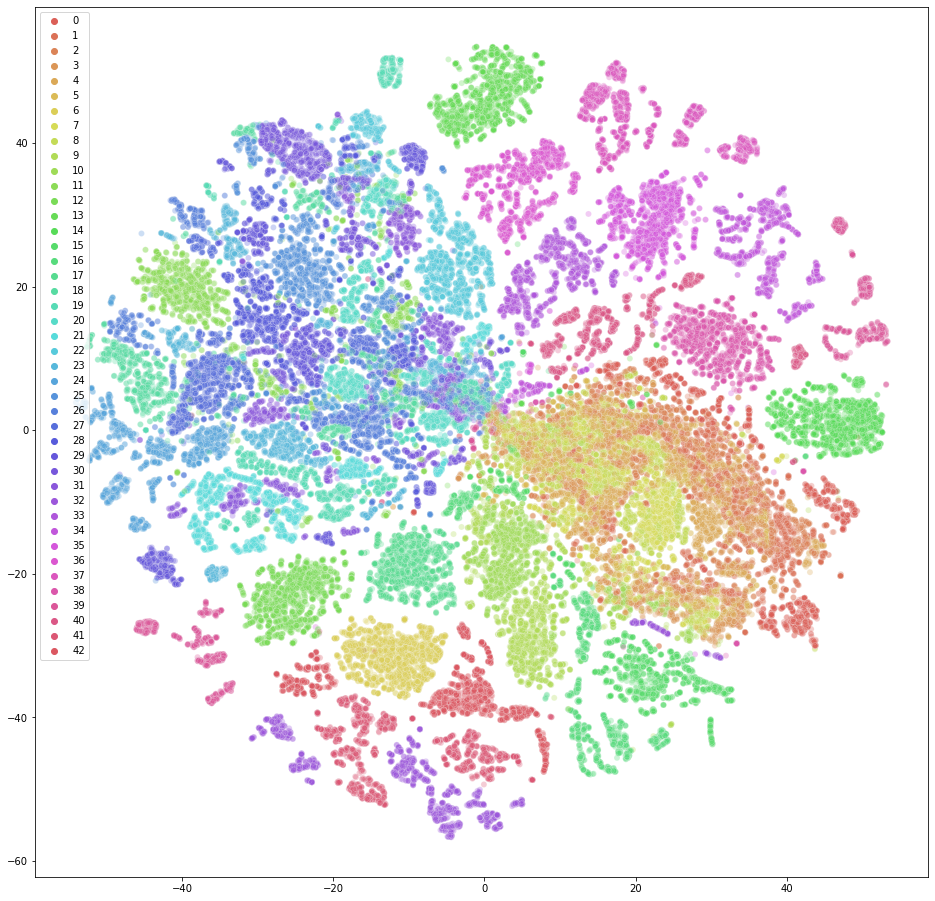

In [84]:
plt.figure(figsize=(16,16))
sns.scatterplot(
    x=tsne_features[:, 0], y=tsne_features[:, 1],
    hue=labels_train,
    palette=sns.color_palette("hls", 43),
    data=tsne_features,
    legend='full',
    alpha=0.3
)

There are some classes that are distinct from the other, but there are some that are on top of each other and that can explain the difference in the scores.

# 8. Cocnlusion

In this project, we did traffic signs classification. First, we use logistic regression as our baseline model, then, we did feature extraction to increase the accuracy of the models. We made 2 combinations of features and the first set of features improved the results and we used it in stronger models - Linear and Kernel SVM. There is much TODO.

# 9. Refferences

1. Images: https://www.kaggle.com/valentynsichkar/traffic-signs-preprocessed
2. OpenCV library: https://docs.opencv.org/4.5.4/
3. Skimage library: https://scikit-image.org/
4. Models: https://scikit-learn.org/stable/
5. Ideas: https://learnopencv.com/getting-started-with-opencv/